In [14]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from konlpy.tag import Mecab
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.font_manager as fm
plt.rc('font', family=fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name())
from tqdm import tqdm
import re

In [15]:
hit_18=pd.read_csv('data/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2018.csv',encoding='cp949')
hit_19=pd.read_csv('data/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2019.csv',encoding='cp949')
hit_20=pd.read_csv('data/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2020.csv',encoding='cp949')
hit_21=pd.read_csv('data/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2021.csv',encoding='cp949')

game=pd.read_csv('data/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_경기일정_2021.csv',encoding='cp949')

player_18=pd.read_csv('data/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_선수_2018.csv',encoding='cp949')
player_19=pd.read_csv('data/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_선수_2019.csv',encoding='cp949')
player_20=pd.read_csv('data/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_선수_2020.csv',encoding='cp949')
player_21=pd.read_csv('data/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_선수_2021.csv',encoding='cp949')

hitter_18=pd.read_csv('data/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2018.csv',encoding='cp949')
hitter_19=pd.read_csv('data/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2019.csv',encoding='cp949')
hitter_20=pd.read_csv('data/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2020.csv',encoding='cp949')
hitter_21=pd.read_csv('data/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2021.csv',encoding='cp949')

team=pd.read_csv('data/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_팀.csv',encoding='cp949')

submission=pd.read_excel('data/02_평가데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_평가데이터.xlsx')

- 76232 - 양의지
- 68050 - 강백호
- 75847 - 최정
- 67341 - 이정후
- 79192 - 채은성
- 78224 - 김재환
- 78513 - 전준우
- 76290 - 김현수
- 79215 - 박건우
- 67872 - 로맥

In [16]:
submission.loc[0,'OPS']=1.097
submission.PCODE[1]=76232;submission.PCODE[2]=68050;submission.PCODE[3]=75847;submission.PCODE[4]=67341;submission.PCODE[5]=79192
submission.PCODE[6]=78224;submission.PCODE[7]=78513;submission.PCODE[8]=76290;submission.PCODE[9]=79215;submission.PCODE[10]=67872;
#ops == 장타율 + 출루율

In [17]:
hit=pd.concat([hit_18,hit_19,hit_20,hit_21],ignore_index=True)
player=pd.concat([player_18,player_19,player_20,player_21],ignore_index=True)
hitter=pd.concat([hitter_18,hitter_19,hitter_20,hitter_21],ignore_index=True)

In [18]:
hit.columns=['연도', '경기코드', '타구코드', '선수코드', '팀코드', '이닝', '타구속도',
       '발사각도', '타격결과', '상대투수투구구속', '해당구장']
player.columns=['연도', '선수코드', '선수명', '팀코드', '포지션', '나이', '연봉']
hitter.columns=['연도', '선수코드', '경기', '타석', '타수', '타율', '안타', '홈런', '루타',
       '장타율', '희생플라이', '볼넷', '삼진', '고의4구', '사구', '병살타']

hitter['출루율']=(hitter.안타+hitter.볼넷+hitter.사구)/(hitter.타수+hitter.볼넷+hitter.사구+hitter.희생플라이)

In [19]:
hit.shape, player.shape, hitter.shape

((120745, 11), (2639, 7), (1098, 17))

In [20]:
# 배럴 정의된 hts 데이터
hts_barrel = pd.read_csv('data/barrel.csv')
hts_barrel.columns = ['연도', '날짜', '경기코드', '타구코드', '선수코드', '팀코드', '이닝', '타구속도',
                      '발사각도', '타격결과', '상대투수투구구속', '해당구장', '발사각', '배럴']

In [21]:
hts_barrel.head()

,연도,날짜,경기코드,타구코드,선수코드,팀코드,이닝,타구속도,발사각도,타격결과,상대투수투구구속,해당구장,발사각,배럴
0,2018,2018-03-24,20180324HHWO0,180324_140436,62797,HH,1,131.50,42.7,플라이,149.59,고척,45도미만,0
1,2018,2018-03-24,20180324HHWO0,180324_140514,76753,HH,1,135.18,9.9,1루타,148.78,고척,10도미만,0
2,2018,2018-03-24,20180324HHWO0,180324_140647,71752,HH,1,152.41,2.1,1루타,148.59,고척,10도미만,0
3,2018,2018-03-24,20180324HHWO0,180324_140911,62700,HH,1,113.72,13.5,1루타,139.13,고척,15도미만,0
4,2018,2018-03-24,20180324HHWO0,180324_142310,78288,HH,2,161.90,3.5,1루타,145.75,고척,10도미만,1


In [22]:
hit = hit.merge(hts_barrel, on=['연도', '경기코드', '타구코드', '선수코드', '팀코드', '이닝', '타구속도', '발사각도', 
                                '타격결과', '상대투수투구구속', '해당구장'], how='left').drop('날짜', axis=1).fillna(0)

In [23]:
hit.head()

,연도,경기코드,타구코드,선수코드,팀코드,이닝,타구속도,발사각도,타격결과,상대투수투구구속,해당구장,발사각,배럴
0,2018,20180324HHWO0,180324_140436,62797,HH,1,131.50,42.7,플라이,149.59,고척,45도미만,0.0
1,2018,20180324HHWO0,180324_140514,76753,HH,1,135.18,9.9,1루타,148.78,고척,10도미만,0.0
2,2018,20180324HHWO0,180324_140647,71752,HH,1,152.41,2.1,1루타,148.59,고척,10도미만,0.0
3,2018,20180324HHWO0,180324_140911,62700,HH,1,113.72,13.5,1루타,139.13,고척,15도미만,0.0
4,2018,20180324HHWO0,180324_142050,68730,HH,2,54.11,16.4,번트안타,134.07,고척,0,0.0


#### hit

경기코드를 통해 상대팀코드 열 추가

In [24]:
hit['상대팀코드']=hit.경기코드.str[-5:-1]

In [25]:
for i in tqdm(range(hit.shape[0])):
    hit['상대팀코드'].iloc[i]=hit.iloc[i].상대팀코드.replace(hit.iloc[i].팀코드,'')

100%|█████████████████████████████████████████████████████████████████████████| 120745/120745 [06:39<00:00, 302.06it/s]


날짜를 이용해 년, 월, 일, 시간 열 추가

In [26]:
hit['날짜']='20'+hit.타구코드.str.split('_').str[0]+hit.타구코드.str.split('_').str[1]
hit['날짜']=pd.to_datetime(hit.날짜)

hit['년']=hit.날짜.dt.year
hit['월']=hit.날짜.dt.month
hit['일']=hit.날짜.dt.day
hit['시간']=hit.날짜.dt.hour

## 타자 정보 이용

In [27]:
hitter_all=pd.merge(hitter,player, how='left', on=['연도','선수코드'])

화이트라는 선수 한번 있는데 연봉 없어서 그냥 제외\
OPS 열 추가

In [28]:
hitter_all=hitter_all.drop(589,axis=0).reset_index().drop('index',axis=1)
hitter_all['OPS']=hitter_all['출루율']+hitter_all['장타율']

연봉 달러를 원단위로 바꾸고 수치형으로 변환

In [29]:
for i in tqdm(range(hitter_all.shape[0])):
    if hitter_all['연봉'].iloc[i][-2:]=='만원':
        hitter_all['연봉'].iloc[i]=float(hitter_all.loc[i,'연봉'][:-2])*10000
    else:
        hitter_all['연봉'].iloc[i]=float(hitter_all.loc[i,'연봉'][:-2])*1150
hitter_all['연봉']=hitter_all['연봉'].astype(float)

100%|████████████████████████████████████████████████████████████████████████████| 1097/1097 [00:00<00:00, 2211.47it/s]


- 경기일정에 있는 데이터 중 9/15 부터 10/8 까지의 선수 10명에 대한 ops, 장타율, 출루율을 예측해주면 된다.
- 시계열적으로 계절이나 이번 년도의 성적이 영향을 미칠 것이다.
- 선수간의 시계열적인 컨디션도 영향이 있을 것

1. hit 는 날짜별 선수들의 매 타석에 대한 내용을 가지고 있다.\
    경기코드를 통해 자신의 팀과 상대 팀의 코드를 알 수 있다.\
    이닝별로도 어떤 타격을 했는지, 타구의 속도, 발사각도, 타격결과가 어떤지, 상대투수투구구속은 얼마인지, 구장은 어딘지 모두 알 수 있다.
- 다만 누락된 데이터와 삼진에 대한 데이터는 없기 때문에 문제가 될 수 있다.

---

- 라운드로 하기

거기에 날짜에 대한 데이터도 넣어야 한다(시계열)\
그리고 라운드별로 선수의 타격 데이터를 예측하는 것을 할 것이고 


***그럼 hit데이터 묶는걸 년도, 라운드, 선수를 기준으로 묶는 것으로 하자 ***

이때의 문제점은 hit데이터를 groupby 한다면 hit데이터의 값들을 어떻게 처리할 것인가가 중요하다

ex) 타격마다 발사각도와 타구속도가 나오는데 이를 살리기 위해서는 두가지를 이용한 배럴 수치에 대한 열을 만드는 것\
그리고 이 값은 묶을 때 어떻게 해결할 것인지 생각해봐야한다

이닝과 시간은 사용하지 못할 것으로 보인다. 

상대팀코드, 우리팀 코드, 년, 월, 일, 라운드, 선수코드, 해당구장 등은 정해진 값이기 때문에 괜찮다.\
상대투수투구구속은 배럴을 이용할 때 사용하면 좋을 것으로 보인다.(상대투수투구구속은 또 생각해봐야한다..)\
타격결과를 어떻게 처리할 것인가,, 라운드마다의 결과를 hitter의 데이터처럼 원핫인코딩하면 좋을 것으로 보인다.

cf) 당연한 것으로 player의 포지션, 나이, 연봉은 년도와 선수코드를 key로 하여 merge 해주는 것\
    hit 데이터를 묶을 때 라운드 별 요일도 넣어줘도 좋을 것으로 보인다.(game(일정) 데이터에도 요일이 있기 때문)
    

---

hit데이터에 보면 같은 날짜인데 경기코드가 두개인 경기가 있다. 이는 더블헤더(=하루에 두경기 하는 것, 라운드를 다르게 해줘야한다)

보면 빠진 경기가 중간중간 있기 때문에 경기기록이 빠져있는 데이터는 크롤링을 해야할 것으로 보인다.

#### 날짜별 선수별로 묶어서 데이터 변형시키기

In [30]:
hit['요일']=hit.날짜.dt.day_of_week

In [31]:
a=hit.groupby(['년','월','일','선수코드'])['팀코드','상대팀코드','해당구장','요일'].first().reset_index();a

,년,월,일,선수코드,팀코드,상대팀코드,해당구장,요일
0,2018,3,24,61102,LG,NC,마산,5
1,2018,3,24,61353,WO,HH,고척,5
2,2018,3,24,61404,SS,OB,잠실,5
3,2018,3,24,61869,SK,LT,문학,5
4,2018,3,24,62404,SS,OB,잠실,5
...,...,...,...,...,...,...,...,...
49665,2021,7,11,78513,LT,SS,대구,6
49666,2021,7,11,78548,KT,HT,광주,6
49667,2021,7,11,78603,HT,KT,광주,6
49668,2021,7,11,78643,HH,SK,문학,6


In [32]:
b=hit.groupby(['년','월','일','선수코드'])['배럴'].sum().reset_index();b

,년,월,일,선수코드,배럴
0,2018,3,24,61102,2.0
1,2018,3,24,61353,1.0
2,2018,3,24,61404,0.0
3,2018,3,24,61869,0.0
4,2018,3,24,62404,0.0
...,...,...,...,...,...
49665,2021,7,11,78513,0.0
49666,2021,7,11,78548,1.0
49667,2021,7,11,78603,1.0
49668,2021,7,11,78643,2.0


#### 타자정보에서 나이와 연봉 타격로그데이터에 넣기

In [33]:
train=pd.merge(a,hitter_all[['연도','선수코드','선수명','나이','연봉']], 
               how='left',left_on=['선수코드','년'],right_on=['선수코드','연도']).drop('연도',axis=1)
train=train.drop(train[train.나이.isna()].index,axis=0).reset_index().drop('index',axis=1)
train=pd.merge(train,b,how='left',on=['년','월','일','선수코드'])

In [34]:
train

,년,월,일,선수코드,팀코드,상대팀코드,해당구장,요일,선수명,나이,연봉,배럴
0,2018,3,24,61102,LG,NC,마산,5,유강남,25.0,185000000.0,2.0
1,2018,3,24,61353,WO,HH,고척,5,고종욱,29.0,110000000.0,1.0
2,2018,3,24,61404,SS,OB,잠실,5,김헌곤,29.0,85000000.0,0.0
3,2018,3,24,61869,SK,LT,문학,5,정진기,25.0,62000000.0,0.0
4,2018,3,24,62404,SS,OB,잠실,5,구자욱,25.0,250000000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
49656,2021,7,11,78513,LT,SS,대구,6,전준우,35.0,500000000.0,0.0
49657,2021,7,11,78548,KT,HT,광주,6,장성우,31.0,210000000.0,1.0
49658,2021,7,11,78603,HT,KT,광주,6,김선빈,31.0,450000000.0,1.0
49659,2021,7,11,78643,HH,SK,문학,6,백용환,32.0,40000000.0,2.0


### 외부데이터

In [35]:
hit_log=pd.read_csv('data/hit_log.csv', index_col=0)

In [36]:
hit_log.columns=['날짜', '상대팀코드', '경기결과', '타순', '포지션', '선발', '타수', '득점', '안타', '2루타', '3루타', '홈런',
       '루타', '타점', '도루', '도루실책', '볼넷', '사구', '고의4구', '삼진', '병살타', '희생번트', '희생플라이', '타율',
       '출루율', '장타율', 'OPS', '투구', 'avLI', 'RE24', 'WPA', '선수명', '연도']

In [37]:
hit_log.shape

(63989, 33)

날짜로 년, 월, 일, 요일 열 추가

In [38]:
hit_log['날짜']=hit_log['연도'].astype('int').astype('str')+hit_log.날짜.str.replace('-','')

hit_log['날짜']=pd.to_datetime(hit_log['날짜'])

hit_log['년']=hit_log.날짜.dt.year
hit_log['월']=hit_log.날짜.dt.month
hit_log['일']=hit_log.날짜.dt.day
hit_log['요일']=hit_log.날짜.dt.day_of_week

hit_log.drop('연도',axis=1,inplace=True)

플레이오프를 한 날짜의 데이터는 제외 ( 144경기 외에 추가적인 경기이므로 )

In [39]:
# 2018년 3월 24일부터 10 14일까지
플레이오프_2018=hit_log[(hit_log.년==2018)&((hit_log.날짜>'2018-10-14')|(hit_log.날짜<'2018-03-24'))].index
# 2019년 3월 23일부터 10월 1일까지
플레이오프_2019=hit_log[(hit_log.년==2019)&((hit_log.날짜>'2019-10-01')|(hit_log.날짜<'2019-03-23'))].index
# 2020년 5월 5일부터 10월 31일까지
플레이오프_2020=hit_log[(hit_log.년==2020)&((hit_log.날짜>'2020-10-31')|(hit_log.날짜<'2020-05-05'))].index

In [40]:
hit_log=hit_log.drop(list(플레이오프_2018)+list(플레이오프_2019)+list(플레이오프_2020))
hit_log=hit_log.reset_index(drop=True)

In [41]:
hit_log['구장']=hit_log.상대팀코드.apply(lambda x : '상대구장' if x[0]=='@' else '홈구장')

상대팀코드 hit_log데이터와 같은 이름으로 변환

In [42]:
hit_log['상대팀코드']=hit_log.상대팀코드.apply(lambda x : x[1:] if x[0]=='@' else x)

In [43]:
def f1(x):
    if x=='삼성':
        return 'SS'
    elif x=='롯데':
        return 'LT'
    elif x=='KIA':
        return 'HT'
    elif x=='키움':
        return 'WO'
    elif x=='두산':
        return 'OB'
    elif x=='한화':
        return 'HH'
    elif x=='넥센':
        return 'WO'
    elif x=='SSG':
        return 'SK'
    else:
        return x

In [44]:
hit_log['상대팀코드']=hit_log['상대팀코드'].apply(f1)

경기 승패 열 추가

In [45]:
hit_log['승패']=hit_log.경기결과.str[0]

일타율 추가

In [46]:
hit_log['일타율'] = ((hit_log['안타'] + hit_log['2루타'] + hit_log['3루타'] + hit_log['홈런']) / hit_log['타수']).fillna(0)

hit_log에 있는 7월 11일까지만 외부데이터에서 사용

In [47]:
# 일단 7월 11일 이후의 자료는 제외하고 진행
hit_log.drop(list(hit_log[hit_log.날짜>'2021-07-11'].index),inplace=True)

# 투수가 타격한 경우는 제외시킨다.
hit_log.drop(list(hit_log[hit_log.포지션=='P'].index),inplace=True)
hit_log=hit_log.reset_index(drop=True)

In [48]:
hit_log.shape

(62563, 39)

hit_log 데이터와 외부데이터 병합

In [49]:
hit_train=pd.merge(hit_log, train[['년', '월', '일', '팀코드', '상대팀코드', '해당구장', '선수명', '배럴']],how='left',left_on=['년','월','일','선수명','상대팀코드'],right_on=['년','월','일','선수명','상대팀코드'])

#### 결측치 처리

- 팀코드
    1. 팀코드가 없는 것은 먼저 같은 날 같은 상대를 만났던 팀의 코드를 넣어준다.
    2. 선수명으로 팀 코드를 넣기 위해 먼저 동명이인인 선수들은 따로 네이버스포츠를 이용하여 직접 수작업으로 넣어준다.
    3. 그런 다음 선수명으로 묶어 팀코드를 넣어준다.
    4. 그런 다음 1번에서 진행했던 것을 한번 더 진행해주면 결측값이 처리된다.

In [50]:
hit_train['팀코드'].fillna(hit_train.groupby(['년','월','일','구장','경기결과','상대팀코드'])['팀코드'].transform('first'),inplace=True)

In [51]:
hit_train.loc[11530:11567,'팀코드']='SK' # 강승호 2018

hit_train.loc[16355:16360,'팀코드']='SS'
hit_train.loc[41000:41053,'팀코드']='SK' # 김재현 2018

hit_train.loc[40749:40808,'팀코드']='NC' # 이명기 2019

hit_train.loc[12079:12111,'팀코드']='HT' # 이우성 2019

In [52]:
hit_train['팀코드'].fillna(hit_train.groupby(['년','선수명'])['팀코드'].transform('first'),inplace=True)
hit_train['팀코드'].fillna(hit_train.groupby(['년','월','일','구장','경기결과','상대팀코드'])['팀코드'].transform('first'),inplace=True)

해당구장이 어딘지 넣어주기 위해 홈구장이면 팀코드를 보고, 상대구장이면 상대팀코드를 보고 구장의 이름을 넣어준다.

In [53]:
for i in tqdm(range(hit_train.shape[0])):
    if hit_train.loc[i,'구장']=='홈구장':
        hit_train['구장'].iloc[i]=hit_train.loc[i,'팀코드']
    else:
        hit_train['구장'].iloc[i]=hit_train.loc[i,'상대팀코드']
hit_train.해당구장.fillna(hit_train.구장,inplace=True)

100%|███████████████████████████████████████████████████████████████████████████| 62563/62563 [01:05<00:00, 957.38it/s]


In [54]:
hit_train['해당구장']=hit_train.해당구장.apply(lambda x : '문학' if x=='SK' else  '대구' if x=='SS' else '사직' if x=='LT' else '수원' if x=='KT' else
                    '대전' if x=='HH' else '광주' if x=='HT' else '고척' if x=='WO' else '잠실' if x=='OB' else '잠실' if x=='LG' else
                    '창원' if x=='NC' else x )

hit_train['해당구장'].iloc[hit_train[(hit_train.해당구장=='창원')&(hit_train.년==2018)].index]='마산'

위의 데이터에 선수명과 나이, 연봉 등을 병합해준다.

In [55]:
hit_train=pd.merge(hit_train, train[['년','월','일','팀코드','선수명','나이','연봉']],how='left',left_on=['년','월','일','팀코드','선수명'],right_on=['년','월','일','팀코드','선수명'])

#### 결측치 처리

- 나이, 연봉
    1. 먼저 동명이인인 선수들의 값은 따로 넣어준다.
    2. 그런 다음 선수명으로 묶어 나이, 연봉값을 넣어준다.

In [56]:
hit_train.loc[11530:11567,['나이','연봉']]=[24,66000000.0] # 강승호 2018

hit_train.loc[16355:16360,['나이','연봉']]=[26,70000000]
hit_train.loc[41000:41053,['나이','연봉']]=[30,51000000.0] # 김재현 2018

hit_train.loc[40749:40808,['나이','연봉']]=[31,220000000.0] # 이명기 2019

hit_train.loc[12079:12111,['나이','연봉']]=[24,40000000.0]  # 이우성 2019

In [57]:
hit_train['나이'].fillna(hit_train.groupby(['년','선수명','팀코드'])['나이'].transform('first'),inplace=True)
hit_train['연봉'].fillna(hit_train.groupby(['년','선수명','팀코드'])['연봉'].transform('first'),inplace=True)

나이값이 없는 데이터는 제외한다.

In [58]:
hit_train.drop(hit_train[hit_train.나이.isna()].index,axis=0,inplace=True)
hit_train.drop('구장',axis=1,inplace=True)

In [153]:
hit_train.head()

,날짜,상대팀코드,경기결과,타순,포지션,선발,타수,득점,안타,2루타,...,월,일,요일,승패,일타율,팀코드,해당구장,배럴,나이,연봉
0,2018-07-19,KT,L 7:8,8,PH,0,1,0,1,0,...,7,19,3,L,1.0,HH,수원,0.0,27.0,27000000.0
1,2018-07-22,SS,L 4:5,8,C,1,3,0,0,0,...,7,22,6,L,0.0,HH,대구,0.0,27.0,27000000.0
2,2018-09-06,KT,W 9:2,5,PR,0,2,1,1,1,...,9,6,3,W,1.0,HH,수원,1.0,27.0,27000000.0
3,2018-09-07,KT,L 4:12,6,PH,0,1,0,0,0,...,9,7,4,L,0.0,HH,수원,0.0,27.0,27000000.0
4,2018-09-09,LG,L 5:8,8,PH,0,2,0,0,0,...,9,9,6,L,0.0,HH,잠실,1.0,27.0,27000000.0


### 더블헤더 살펴보기

- 2018년  
          롯데 1경기 10-10 
          SK   1경기 10-6  
          기아 1경기 10-6
          KT   1경기 10-10
        
- 2019년  
          SK   1경기 9-19  
          두산 1경기 9-19
          NC   1경기 많음
          기아 1경기 많음
        
- 2020년  
          한화 3경기 9-9, 10-7, 10-17 
          롯데 2경기 9-4, 9-20 
          삼성 4경기 6-13, 9-9, 10-3, 10-17 
          SK   3경기 6-11, 6-25, 9-4
          KT   5경기 6-13, 6-25, 8-30, 9-4, 10-3
          NC   4경기 6-25, 9-20, 10-3, 10-10
          LG   5경기 5-16, 6-11, 6-25, 10-3, 10-10
          기아 3경기 8-30, 9-4, 10-7
          두산 2경기 6-25, 9-27
          키움 3경기 5-16, 6-25, 9-27
- 2021년  
          한화 2경기 5-9, 6-16
          삼성 2경기 6-26, 6-30
          KT   2경기 5-9, 6-19
          롯데 3경기 5-29, 6-13, 6-16
          SK   3경기 5-9, 6-16, 6-30
          NC   2경기 5-9, 5-29
          LG   2경기 5-9, 6-26
          기아 3경기 5-9, 6-13, 6-16
          두산 2경기 5-9, 6-19
          키움 1경기 5-9

### 라운드 넣어주기
- 팀별로 라운드별 날짜가 다르기 때문에 날짜를 이용하여 넣을 수 없다. 그래서 팀별로 따로 라운드의 값을 넣어준 것이다.

In [59]:
a = list(range(1,145))

In [60]:
# 2018년
HH_18=hit_train[(hit_train.팀코드=='HH')&(hit_train.년==2018)].groupby(['날짜','경기결과']).first().reset_index();HH_18['라운드']=a
SS_18=hit_train[(hit_train.팀코드=='SS')&(hit_train.년==2018)].groupby(['날짜','경기결과']).first().reset_index();SS_18['라운드']=a
KT_18=hit_train[(hit_train.팀코드=='KT')&(hit_train.년==2018)].groupby(['날짜','경기결과']).first().reset_index();KT_18['라운드']=a
LT_18=hit_train[(hit_train.팀코드=='LT')&(hit_train.년==2018)].groupby(['날짜','경기결과']).first().reset_index();LT_18['라운드']=a
SK_18=hit_train[(hit_train.팀코드=='SK')&(hit_train.년==2018)].groupby(['날짜','경기결과']).first().reset_index();SK_18['라운드']=a
NC_18=hit_train[(hit_train.팀코드=='NC')&(hit_train.년==2018)].groupby(['날짜','경기결과']).first().reset_index();NC_18['라운드']=a
HT_18=hit_train[(hit_train.팀코드=='HT')&(hit_train.년==2018)].groupby(['날짜','경기결과']).first().reset_index();HT_18['라운드']=a
OB_18=hit_train[(hit_train.팀코드=='OB')&(hit_train.년==2018)].groupby(['날짜','경기결과']).first().reset_index();OB_18['라운드']=a
WO_18=hit_train[(hit_train.팀코드=='WO')&(hit_train.년==2018)].groupby(['날짜','경기결과']).first().reset_index();WO_18['라운드']=a
LG_18=hit_train[(hit_train.팀코드=='LG')&(hit_train.년==2018)].groupby(['날짜','경기결과']).first().reset_index();LG_18['라운드']=a

In [61]:
# 2019년
HH_19=hit_train[(hit_train.팀코드=='HH')&(hit_train.년==2019)].groupby(['날짜','경기결과']).first().reset_index();HH_19['라운드']=a
SS_19=hit_train[(hit_train.팀코드=='SS')&(hit_train.년==2019)].groupby(['날짜','경기결과']).first().reset_index();SS_19['라운드']=a
KT_19=hit_train[(hit_train.팀코드=='KT')&(hit_train.년==2019)].groupby(['날짜','경기결과']).first().reset_index();KT_19['라운드']=a
LT_19=hit_train[(hit_train.팀코드=='LT')&(hit_train.년==2019)].groupby(['날짜','경기결과']).first().reset_index();LT_19['라운드']=a
SK_19=hit_train[(hit_train.팀코드=='SK')&(hit_train.년==2019)].groupby(['날짜','경기결과']).first().reset_index();SK_19['라운드']=a
NC_19=hit_train[(hit_train.팀코드=='NC')&(hit_train.년==2019)].groupby(['날짜','경기결과']).first().reset_index();NC_19['라운드']=a
HT_19=hit_train[(hit_train.팀코드=='HT')&(hit_train.년==2019)].groupby(['날짜','경기결과']).first().reset_index();HT_19['라운드']=a
OB_19=hit_train[(hit_train.팀코드=='OB')&(hit_train.년==2019)].groupby(['날짜','경기결과']).first().reset_index();OB_19['라운드']=a
WO_19=hit_train[(hit_train.팀코드=='WO')&(hit_train.년==2019)].groupby(['날짜','경기결과']).first().reset_index();WO_19['라운드']=a
LG_19=hit_train[(hit_train.팀코드=='LG')&(hit_train.년==2019)].groupby(['날짜','경기결과']).first().reset_index();LG_19['라운드']=a

In [62]:
# 2020년
HH_20=hit_train[(hit_train.팀코드=='HH')&(hit_train.년==2020)].groupby(['날짜','경기결과']).first().reset_index();HH_20['라운드']=a
SS_20=hit_train[(hit_train.팀코드=='SS')&(hit_train.년==2020)].groupby(['날짜','경기결과']).first().reset_index();SS_20['라운드']=a
KT_20=hit_train[(hit_train.팀코드=='KT')&(hit_train.년==2020)].groupby(['날짜','경기결과']).first().reset_index();KT_20['라운드']=a
LT_20=hit_train[(hit_train.팀코드=='LT')&(hit_train.년==2020)].groupby(['날짜','경기결과']).first().reset_index();LT_20['라운드']=a
SK_20=hit_train[(hit_train.팀코드=='SK')&(hit_train.년==2020)].groupby(['날짜','경기결과']).first().reset_index();SK_20['라운드']=a
NC_20=hit_train[(hit_train.팀코드=='NC')&(hit_train.년==2020)].groupby(['날짜','경기결과']).first().reset_index();NC_20['라운드']=a
HT_20=hit_train[(hit_train.팀코드=='HT')&(hit_train.년==2020)].groupby(['날짜','경기결과']).first().reset_index();HT_20['라운드']=a
OB_20=hit_train[(hit_train.팀코드=='OB')&(hit_train.년==2020)].groupby(['날짜','경기결과']).first().reset_index();OB_20['라운드']=a
WO_20=hit_train[(hit_train.팀코드=='WO')&(hit_train.년==2020)].groupby(['날짜','경기결과']).first().reset_index();WO_20['라운드']=a
LG_20=hit_train[(hit_train.팀코드=='LG')&(hit_train.년==2020)].groupby(['날짜','경기결과']).first().reset_index();LG_20['라운드']=a

In [63]:
# 2021년
HH_21=hit_train[(hit_train.팀코드=='HH')&(hit_train.년==2021)].groupby(['날짜','경기결과']).first().reset_index();HH_21['라운드']=list(range(1,80))
SS_21=hit_train[(hit_train.팀코드=='SS')&(hit_train.년==2021)].groupby(['날짜','경기결과']).first().reset_index();SS_21['라운드']=list(range(1,80))
KT_21=hit_train[(hit_train.팀코드=='KT')&(hit_train.년==2021)].groupby(['날짜','경기결과']).first().reset_index();KT_21['라운드']=list(range(1,76))
LT_21=hit_train[(hit_train.팀코드=='LT')&(hit_train.년==2021)].groupby(['날짜','경기결과']).first().reset_index();LT_21['라운드']=list(range(1,78))
SK_21=hit_train[(hit_train.팀코드=='SK')&(hit_train.년==2021)].groupby(['날짜','경기결과']).first().reset_index();SK_21['라운드']=list(range(1,79))
NC_21=hit_train[(hit_train.팀코드=='NC')&(hit_train.년==2021)].groupby(['날짜','경기결과']).first().reset_index();NC_21['라운드']=list(range(1,75))
HT_21=hit_train[(hit_train.팀코드=='HT')&(hit_train.년==2021)].groupby(['날짜','경기결과']).first().reset_index();HT_21['라운드']=list(range(1,75))
OB_21=hit_train[(hit_train.팀코드=='OB')&(hit_train.년==2021)].groupby(['날짜','경기결과']).first().reset_index();OB_21['라운드']=list(range(1,75))
WO_21=hit_train[(hit_train.팀코드=='WO')&(hit_train.년==2021)].groupby(['날짜','경기결과']).first().reset_index();WO_21['라운드']=list(range(1,80))
LG_21=hit_train[(hit_train.팀코드=='LG')&(hit_train.년==2021)].groupby(['날짜','경기결과']).first().reset_index();LG_21['라운드']=list(range(1,76))

In [64]:
round_all=pd.concat([HH_18,SS_18,KT_18,LT_18,SK_18,NC_18,HT_18,OB_18,WO_18,LG_18,HH_19,SS_19,KT_19,LT_19,SK_19,NC_19,HT_19,OB_19,WO_19,LG_19,HH_20,SS_20,KT_20,LT_20,SK_20,NC_20,HT_20,OB_20,WO_20,LG_20,HH_21,SS_21,KT_21,LT_21,SK_21,NC_21,HT_21,OB_21,WO_21,LG_21])

In [65]:
data=pd.merge(hit_train,round_all[['날짜','경기결과','상대팀코드','팀코드','라운드']],how='left',on=['날짜','경기결과','상대팀코드','팀코드'])

In [154]:
data.head()

,날짜,상대팀코드,경기결과,타순,포지션,선발,타수,득점,안타,2루타,...,일,요일,승패,일타율,팀코드,해당구장,배럴,나이,연봉,라운드
0,2018-07-19,KT,L 7:8,8,PH,0,1,0,1,0,...,19,3,L,1.0,HH,수원,0.0,27.0,27000000.0,92
1,2018-07-22,SS,L 4:5,8,C,1,3,0,0,0,...,22,6,L,0.0,HH,대구,0.0,27.0,27000000.0,95
2,2018-09-06,KT,W 9:2,5,PR,0,2,1,1,1,...,6,3,W,1.0,HH,수원,1.0,27.0,27000000.0,117
3,2018-09-07,KT,L 4:12,6,PH,0,1,0,0,0,...,7,4,L,0.0,HH,수원,0.0,27.0,27000000.0,118
4,2018-09-09,LG,L 5:8,8,PH,0,2,0,0,0,...,9,6,L,0.0,HH,잠실,1.0,27.0,27000000.0,120


게임 데이터에 우리가 예측해야하는 데이터의 경기날짜와 상대팀에 대한 정보가 있다.\
어느 상대팀을 만났는지에 대한 데이터를 만들기 위해 게임데이터를 이용하여 21년 마지막 21라운드의 경기로그데이터를 만들어 준 것이다.

In [67]:
submission=submission.loc[1:10,:]
submission.reset_index(drop='index',inplace=True)
submission.columns=['NO.', '선수코드', 'OPS', '장타율', '출루율']
submission=pd.merge(submission,player[player.연도==2021][['선수코드','선수명','팀코드']])

In [68]:
game.columns=['경기코드', '날짜', '어웨이팀', '홈팀', '더블헤더', '요일',
       '해당구장', '절기']
game_target=game[game.날짜>=20210915].reset_index(drop='index')

In [69]:
game_target1=game_target.copy()

In [70]:
game_target1.columns=['경기코드', '날짜', '상대팀코드', '팀코드', '더블헤더', '요일', '해당구장', '절기']

In [71]:
game_target.columns=['경기코드', '날짜', '팀코드','상대팀코드',  '더블헤더', '요일', '해당구장', '절기']

In [72]:
round_21=pd.concat([game_target,game_target1]).sort_values(by='날짜')
round_21.reset_index(drop='index',inplace=True)

앞서 타격데이터를 이용하여 만든 data에 선수코드 열이 들어가있지 않아 따로 넣어준 것

In [73]:
player.columns=['년', '선수코드', '선수명', '팀코드', '포지션', '나이', '연봉']

In [74]:
ab=pd.merge(data,player[['년','선수코드','선수명','팀코드','나이']],how='left',on=['년','선수명','팀코드','나이'])
ab.drop(ab[ab.선수코드.isna()].index,inplace=True)

In [75]:
ab.reset_index(drop='index',inplace=True)

이전구장과 당일구장의 거리에 대한 컨디션 값을 넣어주기 위해 만든 것

In [76]:
ab['이전구장'] = ab.groupby('선수코드')['해당구장'].shift(1)

In [77]:
수도권 = ['잠실', '문학', '수원', '고척']
충청도 = ['대전']
전라도 = ['광주']
경상도 = ['대구', '사직', '마산', '창원']

In [78]:
# 수도권 -> 수도권 : 1
# 수도권 -> 충청도 : 2
# 수도권 -> 전라도 : 3
# 수도권 -> 경상도 : 4
# 충청도 -> 전라도 : 2
# 충청도 -> 경상도 : 3
# 충청도 -> 충청도 : 1
# 전라도 -> 전라도 : 1
# 전라도 -> 경상도 : 2
# 경상도 -> 경상도 : 1

In [79]:
def distance_weight(hit_log):
    hit_log['이동거리_가중치'] = 0
    for i in range(hit_log.shape[0]):
        if (hit_log['이전구장'][i] in 수도권) and (hit_log['해당구장'][i] in 수도권):
            hit_log['이동거리_가중치'][i] = 1
            
        elif (hit_log['이전구장'][i] in 수도권) and (hit_log['해당구장'][i] in 충청도):
            hit_log['이동거리_가중치'][i] = 2   
        elif (hit_log['이전구장'][i] in 충청도) and (hit_log['해당구장'][i] in 수도권):
            hit_log['이동거리_가중치'][i] = 2
            
        elif (hit_log['이전구장'][i] in 수도권) and (hit_log['해당구장'][i] in 전라도):
            hit_log['이동거리_가중치'][i] = 3
        elif (hit_log['이전구장'][i] in 전라도) and (hit_log['해당구장'][i] in 수도권):
            hit_log['이동거리_가중치'][i] = 3
            
        elif (hit_log['이전구장'][i] in 수도권) and (hit_log['해당구장'][i] in 경상도):
            hit_log['이동거리_가중치'][i] = 4
        elif (hit_log['이전구장'][i] in 경상도) and (hit_log['해당구장'][i] in 수도권):
            hit_log['이동거리_가중치'][i] = 4
            
        elif (hit_log['이전구장'][i] in 충청도) and (hit_log['해당구장'][i] in 전라도):
            hit_log['이동거리_가중치'][i] = 2
        elif (hit_log['이전구장'][i] in 전라도) and (hit_log['해당구장'][i] in 충청도):
            hit_log['이동거리_가중치'][i] = 2
        
        elif (hit_log['이전구장'][i] in 충청도) and (hit_log['해당구장'][i] in 경상도):
            hit_log['이동거리_가중치'][i] = 3
        elif (hit_log['이전구장'][i] in 경상도) and (hit_log['해당구장'][i] in 충청도):
            hit_log['이동거리_가중치'][i] = 3
        
        elif (hit_log['이전구장'][i] in 전라도) and (hit_log['해당구장'][i] in 경상도):
            hit_log['이동거리_가중치'][i] = 2
        elif (hit_log['이전구장'][i] in 경상도) and (hit_log['해당구장'][i] in 전라도):
            hit_log['이동거리_가중치'][i] = 2
            
        elif (hit_log['이전구장'][i] in 경상도) and (hit_log['해당구장'][i] in 경상도):
            hit_log['이동거리_가중치'][i] = 1
            
        elif (hit_log['이전구장'][i] in 충청도) and (hit_log['해당구장'][i] in 충청도):
            hit_log['이동거리_가중치'][i] = 1
            
        elif (hit_log['이전구장'][i] in 전라도) and (hit_log['해당구장'][i] in 전라도):
            hit_log['이동거리_가중치'][i] = 1
            
        else:
            hit_log['이동거리_가중치'][i] = 0
            
distance_weight(ab)

WPA 와 avLI 이용하여 만든 열

In [80]:
ab['WPA/avLI']=ab.WPA/(ab.avLI+0.000001)

팀의 승패

In [81]:
ab=pd.concat([ab,pd.get_dummies(ab.승패)],axis=1)

팀이 낸 점수

In [82]:
ab['팀점수']=ab.경기결과.str[2].apply(lambda x : 0 if x ==':' else x)
ab['팀점수'] = ab['팀점수'].astype(int)

### 데이터 셋 생성
- 년도별, 라운드별로 데이터셋들을 생성한 것이다.

In [83]:
d_18=ab[ab.년==2018]
d_19=ab[ab.년==2019]
d_20=ab[ab.년==2020]
d_21=ab[ab.년==2021]

In [84]:
# test는 출루율, 장타율, ops를 구하기 위한 것
train_18_1 = d_18.query('라운드 <=20')
train_18_2 = d_18.query('20< 라운드 <=40')
train_18_3 = d_18.query('40< 라운드 <=60')
train_18_4 = d_18.query('60< 라운드 <=81')
train_18_5 = d_18.query('81< 라운드 <=102')
train_18_6 = d_18.query('102< 라운드 <=123')
test_18 = d_18.query('라운드 >=124')

train_19_1 = d_19.query('라운드 <=20')
train_19_2 = d_19.query('20< 라운드 <=40')
train_19_3 = d_19.query('40< 라운드 <=60')
train_19_4 = d_19.query('60< 라운드 <=81')
train_19_5 = d_19.query('81< 라운드 <=102')
train_19_6 = d_19.query('102< 라운드 <=123')
test_19 = d_19.query('라운드 >=124')

train_20_1 = d_20.query('라운드 <=20')
train_20_2 = d_20.query('20< 라운드 <=40')
train_20_3 = d_20.query('40< 라운드 <=60')
train_20_4 = d_20.query('60< 라운드 <=81')
train_20_5 = d_20.query('81< 라운드 <=102')
train_20_6 = d_20.query('102< 라운드 <=123')
test_20 = d_20.query('라운드 >=124')

train_21_1 = d_21.query('라운드 <=20')
train_21_2 = d_21.query('20< 라운드 <=40')
train_21_3 = d_21.query('40< 라운드 <=60')
train_21_4 = d_21.query('60< 라운드 <=81')

#### 라운드별로 나눈 후 각 라운드 별, 팀 별 최대연승이 얼마나 되는지 알아보기 위한 열

In [85]:
# 팀 최대 연승
def f1(train):
    mw=train.groupby(['팀코드','날짜']).first().reset_index()[['팀코드','W']]
    mw['이전팀코드']=mw.팀코드.shift(1)
    mw=mw.fillna('start')

    n=0
    lst=[]
    alst=[]
    for i in range(mw.shape[0]):
        if mw.이전팀코드[i]=='start':
            if mw.W[i]==1:
                n+=1
            else:
                pass
        elif mw.이전팀코드[i]!=mw.팀코드[i]:
            alst.append(max(lst))
            lst=[]
            if mw.W[i]==1:
                n+=1
            else:
                pass
        else:
            if mw.W[i]==1:
                n+=1
            else:
                lst.append(n)
                n=0
    alst.append(max(lst))

    mw=mw.groupby('팀코드').first().reset_index().drop(['W','이전팀코드'],axis=1)
    mw['최대연승']=alst

    train=pd.merge(train, mw, how='left',on='팀코드')
    
    return train

In [86]:
#모든 데이터에 최대연승 추가
train_18_1 = f1(train_18_1)
train_18_2 = f1(train_18_2)
train_18_3 = f1(train_18_3)
train_18_4 = f1(train_18_4)
test_18 = f1(test_18)

train_19_1 = f1(train_19_1)
train_19_2 = f1(train_19_2)
train_19_3 = f1(train_19_3)
train_19_4 = f1(train_19_4)
test_19 = f1(test_19)

train_20_1 = f1(train_20_1)
train_20_2 = f1(train_20_2)
train_20_3 = f1(train_20_3)
train_20_4 = f1(train_20_4)
test_20 = f1(test_20)

train_21_1 = f1(train_21_1)
train_21_2 = f1(train_21_2)
train_21_3 = f1(train_21_3)
train_21_4 = f1(train_21_4)

#### 팀별로 상대팀에 따른 WPA 차이

In [87]:
# 팀별 상대팀에 따른 능력치
팀_상대팀_관계=pd.concat([d_18.groupby(['팀코드','상대팀코드','년']).WPA.mean().reset_index(),d_19.groupby(['팀코드','상대팀코드','년']).WPA.mean().reset_index(),d_20.groupby(['팀코드','상대팀코드','년']).WPA.mean().reset_index(),d_21.groupby(['팀코드','상대팀코드','년']).WPA.mean().reset_index()],ignore_index=True)
팀_상대팀_관계.columns=['팀코드','상대팀코드','년','팀팀WPA']

train_18_1=pd.merge(train_18_1,팀_상대팀_관계, how='left',on=['팀코드','상대팀코드','년'])
train_18_2=pd.merge(train_18_2,팀_상대팀_관계, how='left',on=['팀코드','상대팀코드','년'])
train_18_3=pd.merge(train_18_3,팀_상대팀_관계, how='left',on=['팀코드','상대팀코드','년'])
train_18_4=pd.merge(train_18_4,팀_상대팀_관계, how='left',on=['팀코드','상대팀코드','년'])
train_18_5=pd.merge(train_18_5,팀_상대팀_관계, how='left',on=['팀코드','상대팀코드','년'])
train_18_6=pd.merge(train_18_6,팀_상대팀_관계, how='left',on=['팀코드','상대팀코드','년'])
test_18=pd.merge(test_18,팀_상대팀_관계, how='left',on=['팀코드','상대팀코드','년'])

train_19_1=pd.merge(train_19_1,팀_상대팀_관계, how='left',on=['팀코드','상대팀코드','년'])
train_19_2=pd.merge(train_19_2,팀_상대팀_관계, how='left',on=['팀코드','상대팀코드','년'])
train_19_3=pd.merge(train_19_3,팀_상대팀_관계, how='left',on=['팀코드','상대팀코드','년'])
train_19_4=pd.merge(train_19_4,팀_상대팀_관계, how='left',on=['팀코드','상대팀코드','년'])
train_19_5=pd.merge(train_19_5,팀_상대팀_관계, how='left',on=['팀코드','상대팀코드','년'])
train_19_6=pd.merge(train_19_6,팀_상대팀_관계, how='left',on=['팀코드','상대팀코드','년'])
test_19=pd.merge(test_19,팀_상대팀_관계, how='left',on=['팀코드','상대팀코드','년'])

train_20_1=pd.merge(train_20_1,팀_상대팀_관계, how='left',on=['팀코드','상대팀코드','년'])
train_20_2=pd.merge(train_20_2,팀_상대팀_관계, how='left',on=['팀코드','상대팀코드','년'])
train_20_3=pd.merge(train_20_3,팀_상대팀_관계, how='left',on=['팀코드','상대팀코드','년'])
train_20_4=pd.merge(train_20_4,팀_상대팀_관계, how='left',on=['팀코드','상대팀코드','년'])
train_20_5=pd.merge(train_20_5,팀_상대팀_관계, how='left',on=['팀코드','상대팀코드','년'])
train_20_6=pd.merge(train_20_6,팀_상대팀_관계, how='left',on=['팀코드','상대팀코드','년'])
test_20=pd.merge(test_20,팀_상대팀_관계, how='left',on=['팀코드','상대팀코드','년'])

train_21_1=pd.merge(train_21_1,팀_상대팀_관계, how='left',on=['팀코드','상대팀코드','년'])
train_21_2=pd.merge(train_21_2,팀_상대팀_관계, how='left',on=['팀코드','상대팀코드','년'])
train_21_3=pd.merge(train_21_3,팀_상대팀_관계, how='left',on=['팀코드','상대팀코드','년'])
train_21_4=pd.merge(train_21_4,팀_상대팀_관계, how='left',on=['팀코드','상대팀코드','년'])

#### 선수별로 상대팀에 따른 WPA 차이

In [88]:
선수_상대팀_관계=pd.concat([d_18.groupby(['선수코드','상대팀코드','년']).WPA.mean().reset_index(),d_19.groupby(['선수코드','상대팀코드','년']).WPA.mean().reset_index(),d_20.groupby(['선수코드','상대팀코드','년']).WPA.mean().reset_index(),d_21.groupby(['선수코드','상대팀코드','년']).WPA.mean().reset_index()],ignore_index=True)
선수_상대팀_관계.columns=['선수코드','상대팀코드','년','상대별WPA']

train_18_1=pd.merge(train_18_1,선수_상대팀_관계, how='left',on=['선수코드','상대팀코드','년'])
train_18_2=pd.merge(train_18_2,선수_상대팀_관계, how='left',on=['선수코드','상대팀코드','년'])
train_18_3=pd.merge(train_18_3,선수_상대팀_관계, how='left',on=['선수코드','상대팀코드','년'])
train_18_4=pd.merge(train_18_4,선수_상대팀_관계, how='left',on=['선수코드','상대팀코드','년'])
train_18_5=pd.merge(train_18_5,선수_상대팀_관계, how='left',on=['선수코드','상대팀코드','년'])
train_18_6=pd.merge(train_18_6,선수_상대팀_관계, how='left',on=['선수코드','상대팀코드','년'])
test_18=pd.merge(test_18,선수_상대팀_관계, how='left',on=['선수코드','상대팀코드','년'])

train_19_1=pd.merge(train_19_1,선수_상대팀_관계, how='left',on=['선수코드','상대팀코드','년'])
train_19_2=pd.merge(train_19_2,선수_상대팀_관계, how='left',on=['선수코드','상대팀코드','년'])
train_19_3=pd.merge(train_19_3,선수_상대팀_관계, how='left',on=['선수코드','상대팀코드','년'])
train_19_4=pd.merge(train_19_4,선수_상대팀_관계, how='left',on=['선수코드','상대팀코드','년'])
train_19_5=pd.merge(train_19_5,선수_상대팀_관계, how='left',on=['선수코드','상대팀코드','년'])
train_19_6=pd.merge(train_19_6,선수_상대팀_관계, how='left',on=['선수코드','상대팀코드','년'])
test_19=pd.merge(test_19,선수_상대팀_관계, how='left',on=['선수코드','상대팀코드','년'])

train_20_1=pd.merge(train_20_1,선수_상대팀_관계, how='left',on=['선수코드','상대팀코드','년'])
train_20_2=pd.merge(train_20_2,선수_상대팀_관계, how='left',on=['선수코드','상대팀코드','년'])
train_20_3=pd.merge(train_20_3,선수_상대팀_관계, how='left',on=['선수코드','상대팀코드','년'])
train_20_4=pd.merge(train_20_4,선수_상대팀_관계, how='left',on=['선수코드','상대팀코드','년'])
train_20_5=pd.merge(train_20_5,선수_상대팀_관계, how='left',on=['선수코드','상대팀코드','년'])
train_20_6=pd.merge(train_20_6,선수_상대팀_관계, how='left',on=['선수코드','상대팀코드','년'])
test_20=pd.merge(test_20,선수_상대팀_관계, how='left',on=['선수코드','상대팀코드','년'])

train_21_1=pd.merge(train_21_1,선수_상대팀_관계, how='left',on=['선수코드','상대팀코드','년'])
train_21_2=pd.merge(train_21_2,선수_상대팀_관계, how='left',on=['선수코드','상대팀코드','년'])
train_21_3=pd.merge(train_21_3,선수_상대팀_관계, how='left',on=['선수코드','상대팀코드','년'])
train_21_4=pd.merge(train_21_4,선수_상대팀_관계, how='left',on=['선수코드','상대팀코드','년'])

#### feature

* 선수 역량
  - 배럴
  - 많은 개인 역량들 사용

* 팀 역량
  - 팀의 승패
  - 팀이 낸 점수
  - 최대 연승
    
* 컨디션
  - 이동거리

* 시계열적 - 뺄지말지
  - 라운드별 - x
  - 요일별 
  - 월별 - x

In [89]:
def train_set(train, test):
    
    ### train과 test 둘 다 있는 선수 뽑아내기
    pl = list(set(train['선수코드'].unique()) & set(test['선수코드'].unique()))
    
    ### 선수역량
    agg_dict = {
        # 개인기록
        '선발':['sum'],
        '타순':['mean'],
        '타수':['sum', 'mean', 'max'],
        '득점':['sum', 'mean', 'max'],
        '안타':['sum', 'mean', 'max'],
        '2루타':['sum', 'mean', 'max'],
        '3루타':['sum', 'mean', 'max'],
        '홈런':['sum', 'mean', 'max'],
        '루타':['sum', 'mean', 'max', 'std'],
        '타점':['sum', 'mean', 'max', 'std'],
        '도루':['sum', 'mean', 'max'],
        '도루실책':['sum', 'mean', 'max'],
        '볼넷':['sum', 'mean', 'max'],
        '사구':['sum', 'mean', 'max'],
        '고의4구':['sum', 'mean', 'max'],
        '삼진':['sum', 'mean', 'max'],
        '병살타':['sum', 'mean', 'max'],
        '희생번트':['sum', 'mean', 'max'],
        '희생플라이':['sum', 'mean', 'max'],
        '타율':['last', 'std'],
        '일타율':['mean', 'std'],
        '투구':['mean', 'max'],
        'avLI':['mean', 'max', 'std'],   #상황상 얼마나 중요할때 나왔는지
        'RE24':['mean', 'max', 'std'],   #어려운 상황에서 득점을 연결해 승리를 이끈 정도
        'WPA':['mean', 'max', 'std'],    #선수가 불러일으킨 승리 기댓값 변화를 모두 더한 것
        'WPA/avLI':['mean', 'max', 'std'],
        '나이':['mean'],
        '연봉':['mean'], 
        '출루율':['last'],
        '장타율':['last'],
        'OPS':['last'],
        '상대별WPA':['mean'],
        '팀팀WPA':['mean'],
        '배럴':['mean', 'sum']
    }
    f = train.groupby('선수코드').agg(agg_dict)
    f = f.fillna(0)
    f.columns = [('_').join(column).upper() for column in f.columns.ravel()]
    f['안타/타수'] = f['안타_SUM'] / f['타수_SUM']
    f['2타/타수'] = f['2루타_SUM'] / f['타수_SUM']
    f['3타/타수'] = f['3루타_SUM'] / f['타수_SUM']
    f['홈런/타수'] = f['홈런_SUM'] / f['타수_SUM']
    f['루타/타수'] = f['루타_SUM'] / f['타수_SUM']
    f['연봉/나이'] = f['연봉_MEAN'] / f['나이_MEAN'] # 새로 만들었는데 영향력이 강하다. 연봉의 의미가 있는 것일까...
    f['배럴/타수'] = f['배럴_SUM'] / f['타수_SUM']
    f['배럴/장타'] = f['배럴_SUM'] / (f['2루타_SUM']+f['3루타_SUM']+f['홈런_SUM']+1)
    f['배럴/타구'] = f['배럴_SUM'] / (f['안타_SUM']+f['2루타_SUM']+f['3루타_SUM']+f['홈런_SUM']+1)
    f.columns = ['개인역량_' + column for column in f.columns.ravel()]
    f = f.reset_index()
    
    # 상대별 배럴타구
    a = train.groupby(['선수코드', '상대팀코드'])['배럴'].sum().unstack().fillna(0)
    b = train.groupby(['선수코드', '상대팀코드'])['배럴'].mean().unstack().fillna(0)
    a.columns = ['개인역량_상대팀별_배럴_합_' + ('_').join(str(column)).upper() for column in a.columns.ravel()]
    b.columns = ['개인역량_상대팀별_배럴_평균' + ('_').join(str(column)).upper() for column in b.columns.ravel()]
    a = a.reset_index()
    b = b.reset_index()
    
    f = f.merge(a, on='선수코드', how='left')
    f = f.merge(b, on='선수코드', how='left')
    
    f = f.reset_index()
    
    ### 팀 역량
    agg_dict1 = {
        # 팀의 승패
        'W':['sum'],
        'D':['sum'],
        'L':['sum'],
        # 팀이 낸 점수
        '팀점수':['sum', 'mean', 'max', 'std'],
        # 최대 연승나와야함
        '최대연승':['max']
    }
    f1 = train.groupby('선수코드').agg(agg_dict1)
    f1 = f1.fillna(0)
    f1.columns = [('_').join(column).upper() for column in f1.columns.ravel()]
    f1.columns = ['팀역량_' + column for column in f1.columns.ravel()]
    f1 = f1.reset_index()

    
    
    ### 컨디션
    agg_dict2 = {
        # 이동거리
        '이동거리_가중치':['mean', 'std'],
    }
    f2 = train.groupby('선수코드').agg(agg_dict2)
    f2 = f2.fillna(0)
    f2.columns = [('_').join(column).upper() for column in f2.columns.ravel()]
    f2.columns = ['컨디션_' + column for column in f2.columns.ravel()]
    f2 = f2.reset_index()
    
    
    
    ### 시계열적 요소
    agg_dict3 = {
        '월':['mean'],
        '라운드':['mean'],
    }
    f3 = train.groupby('선수코드').agg(agg_dict3)
    f3 = f3.fillna(0)
    f3.columns = ['시계열적_' + str(column) for column in f3.columns.ravel()]
    # 요일별 성적
    a = train.groupby(['선수코드', '요일'])['WPA/avLI'].mean().unstack().fillna(0)
    b = train.groupby(['선수코드', '요일'])['일타율'].mean().unstack().fillna(0)
    a.columns = ['시계열적_요일별_WPA/avLI_' + ('_').join(str(column)).upper() for column in a.columns.ravel()]
    b.columns = ['시계열적_요일별_일타율_' + ('_').join(str(column)).upper() for column in b.columns.ravel()]
    a = a.reset_index()
    b = b.reset_index()
    
    f3 = f3.merge(a, on='선수코드', how='left')
    f3 = f3.merge(b, on='선수코드', how='left')
    
    f3 = f3.reset_index()
    
        
    
    f = f.merge(f1, on='선수코드', how='left')
    f = f.merge(f2, on='선수코드', how='left')
    f = f.merge(f3, on='선수코드', how='left')

    f = f.reset_index(drop=True)
    f = f.loc[f['선수코드'].isin(pl)]
    f = f.drop(['index_x', 'index_y'], axis=1)
    
    return f

## 이전 20라운드의 타격결과로 다음 20라운드의 OPS결과를 예측하는 것

In [90]:
train18_1 = train_set(train_18_1, train_18_2)
train18_2 = train_set(train_18_2, train_18_3)
train18_3 = train_set(train_18_3, train_18_4)
train18_4 = train_set(train_18_4, test_18)
#train18 = train_set(train_18_4, train_18_5)
#train18 = train_set(train_18_5, train_18_6)
#train18 = train_set(train_18_6, test_18)

train19_1 = train_set(train_19_1, train_19_2)
train19_2 = train_set(train_19_2, train_19_3)
train19_3 = train_set(train_19_3, train_19_4)
train19_4 = train_set(train_19_4, test_19)
#train19 = train_set(train_19_4, train_19_5)
#train19 = train_set(train_19_5, train_19_6)
#train19 = train_set(train_19_6, test_19)

train20_1 = train_set(train_20_1, train_20_2)
train20_2 = train_set(train_20_2, train_20_3)
train20_3 = train_set(train_20_3, train_20_4)
train20_4 = train_set(train_20_4, test_20)
#train20 = train_set(train_20_4, train_20_5)
#train20 = train_set(train_20_5, train_20_6)
#train20 = train_set(train_20_6, test_20)

train21_1 = train_set(train_21_1, train_21_2)
train21_2 = train_set(train_21_2, train_21_3)
train21_3 = train_set(train_21_3, train_21_4)
train21 = train_set(train_21_4, submission)     ## 예측 할 데이터
train21.reset_index(drop='index',inplace=True)

### 시계열적 요소를 위해 연도를 넣어준다

In [91]:
train18_1['연도']=2018
train18_2['연도']=2018
train18_3['연도']=2018
train18_4['연도']=2018

train19_1['연도']=2019
train19_2['연도']=2019
train19_3['연도']=2019
train19_4['연도']=2019

train20_1['연도']=2020
train20_2['연도']=2020
train20_3['연도']=2020
train20_4['연도']=2020

train21_1['연도']=2021
train21_2['연도']=2021
train21_3['연도']=2021
train21['연도']=2021

In [92]:
sub_10=pd.merge(round_21,submission[['선수코드','팀코드']],how='left',on='팀코드')
sub_10.drop(sub_10[sub_10.선수코드.isna()].index,axis=0,inplace=True)

### 라운드별로 어떤 상대팀을 만났는지 알 수 있는 열( 원핫 느낌 )

In [93]:
train18_1=pd.merge(train18_1,train_18_1.groupby('선수코드')['상대팀코드'].value_counts().unstack().reset_index(),how='left',on='선수코드').fillna(0)
train18_2=pd.merge(train18_2,train_18_2.groupby('선수코드')['상대팀코드'].value_counts().unstack().reset_index(),how='left',on='선수코드').fillna(0)
train18_3=pd.merge(train18_3,train_18_3.groupby('선수코드')['상대팀코드'].value_counts().unstack().reset_index(),how='left',on='선수코드').fillna(0)
train18_4=pd.merge(train18_4,train_18_4.groupby('선수코드')['상대팀코드'].value_counts().unstack().reset_index(),how='left',on='선수코드').fillna(0)

train19_1=pd.merge(train19_1,train_19_1.groupby('선수코드')['상대팀코드'].value_counts().unstack().reset_index(),how='left',on='선수코드').fillna(0)
train19_2=pd.merge(train19_2,train_19_2.groupby('선수코드')['상대팀코드'].value_counts().unstack().reset_index(),how='left',on='선수코드').fillna(0)
train19_3=pd.merge(train19_3,train_19_3.groupby('선수코드')['상대팀코드'].value_counts().unstack().reset_index(),how='left',on='선수코드').fillna(0)
train19_4=pd.merge(train19_4,train_19_4.groupby('선수코드')['상대팀코드'].value_counts().unstack().reset_index(),how='left',on='선수코드').fillna(0)

train20_1=pd.merge(train20_1,train_20_1.groupby('선수코드')['상대팀코드'].value_counts().unstack().reset_index(),how='left',on='선수코드').fillna(0)
train20_2=pd.merge(train20_2,train_20_2.groupby('선수코드')['상대팀코드'].value_counts().unstack().reset_index(),how='left',on='선수코드').fillna(0)
train20_3=pd.merge(train20_3,train_20_3.groupby('선수코드')['상대팀코드'].value_counts().unstack().reset_index(),how='left',on='선수코드').fillna(0)
train20_4=pd.merge(train20_4,train_20_4.groupby('선수코드')['상대팀코드'].value_counts().unstack().reset_index(),how='left',on='선수코드').fillna(0)

train21_1=pd.merge(train21_1,train_21_1.groupby('선수코드')['상대팀코드'].value_counts().unstack().reset_index(),how='left',on='선수코드').fillna(0)
train21_2=pd.merge(train21_2,train_21_2.groupby('선수코드')['상대팀코드'].value_counts().unstack().reset_index(),how='left',on='선수코드').fillna(0)
train21_3=pd.merge(train21_3,train_21_3.groupby('선수코드')['상대팀코드'].value_counts().unstack().reset_index(),how='left',on='선수코드').fillna(0)
train21=pd.merge(train21,sub_10.groupby('선수코드')['상대팀코드'].value_counts().unstack().reset_index(),how='left',on='선수코드').fillna(0)

In [94]:
ftr = pd.concat([train18_1,train18_2,train18_3,train18_4, 
                 train19_1,train19_2,train19_3,train19_4, 
                 train20_1,train20_2,train20_3,train20_4,
                 train21_1,train21_2,train21_3], axis=0)

ftr = ftr.reset_index(drop=True)

In [95]:
X_test = train21.drop('선수코드', axis=1)

In [96]:
ftr.shape, X_test.shape

((2374, 149), (10, 148))

In [97]:
ftr.head()

,선수코드,개인역량_선발_SUM,개인역량_타순_MEAN,개인역량_타수_SUM,개인역량_타수_MEAN,개인역량_타수_MAX,개인역량_득점_SUM,개인역량_득점_MEAN,개인역량_득점_MAX,개인역량_안타_SUM,...,KT,LG,LT,NC,OB,SK,SS,WO,시계열적_요일별_WPA/avLI_0,시계열적_요일별_일타율_0
0,60343.0,10,8.000000,40,2.500000,5,8,0.500000,2,13,...,0.0,3.0,0.0,3.0,2.0,3.0,0.0,3.0,NaN,NaN
1,60558.0,11,4.650000,48,2.400000,6,9,0.450000,3,12,...,0.0,3.0,0.0,3.0,3.0,4.0,0.0,3.0,NaN,NaN
2,60566.0,4,5.842105,23,1.210526,5,3,0.157895,1,7,...,3.0,2.0,3.0,0.0,2.0,3.0,3.0,1.0,NaN,NaN
3,60605.0,1,9.000000,4,4.000000,4,2,2.000000,2,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,61102.0,17,7.058824,58,3.411765,5,12,0.705882,3,21,...,2.0,0.0,3.0,2.0,1.0,3.0,0.0,2.0,NaN,NaN


#### target

In [98]:
def test_set(train, test):
    
    # train과 test 둘 다 있는 선수 뽑아내기
    pl = list(set(train['선수코드'].unique()) & set(test['선수코드'].unique()))
    
    # 출루율 파트
    AB = pd.DataFrame(test.groupby('선수코드')['타수'].sum())
    H = pd.DataFrame(test.groupby('선수코드')['안타'].sum() + test.groupby('선수코드')['2루타'].sum() + test.groupby('선수코드')['3루타'].sum() + test.groupby('선수코드')['홈런'].sum())
    BB = pd.DataFrame(test.groupby('선수코드')['볼넷'].sum())
    HBP = pd.DataFrame(test.groupby('선수코드')['사구'].sum())
    SF = pd.DataFrame(test.groupby('선수코드')['희생번트'].sum() + test.groupby('선수코드')['희생플라이'].sum())
    
    # 장타율 파트
    H1 = pd.DataFrame(test.groupby('선수코드')['안타'].sum())
    H2 = pd.DataFrame(test.groupby('선수코드')['2루타'].sum())
    H3 = pd.DataFrame(test.groupby('선수코드')['3루타'].sum())
    HR = pd.DataFrame(test.groupby('선수코드')['홈런'].sum())
    
    test = AB.merge(H, on='선수코드')
    test = test.merge(BB, on='선수코드')
    test = test.merge(HBP, on='선수코드')
    test = test.merge(SF, on='선수코드')
    test = test.merge(H1, on='선수코드')
    test = test.merge(H2, on='선수코드')
    test = test.merge(H3, on='선수코드')
    test = test.merge(HR, on='선수코드')
    
    test.columns = ['타수', '총안타', '볼넷', '사구', '희생타', '안타', '2루타', '3루타', '홈런']
    
    test['출루율'] = (test['총안타'] + test['볼넷'] + test['사구']) / (test['타수'] + test['볼넷'] + test['사구'] + test['희생타'])
    test['장타율'] = (test['안타'] + 2*test['2루타'] + 3*test['3루타'] + 4*test['홈런']) / test['타수']
    test['OPS'] = test['출루율'] + test['장타율']
    
    test = test.reset_index()
    test = test.loc[test['선수코드'].isin(pl)]
    
    return test[['출루율', '장타율', 'OPS']]

In [99]:
# 전 20라운드의 결과로 다음 20라운드의 결과 예측하는 느낌은 어떤가 해서 만들어 봄

test18_1 = test_set(train_18_1, train_18_2).fillna(0)
test18_2 = test_set(train_18_2, train_18_3).fillna(0)
test18_3 = test_set(train_18_3, train_18_4).fillna(0)
test18_4 = test_set(train_18_4, test_18).fillna(0)
#test18 = test_set(train_18_4, train_18_5)
#test18 = test_set(train_18_5, train_18_6)
#test18 = test_set(train_18_6, test_18)

test19_1 = test_set(train_19_1, train_19_2).fillna(0)
test19_2 = test_set(train_19_2, train_19_3).fillna(0)
test19_3 = test_set(train_19_3, train_19_4).fillna(0)
test19_4 = test_set(train_19_4, test_19).fillna(0)
#test19 = test_set(train_19_4, train_19_5)
#test19 = test_set(train_19_5, train_19_6)
#test19 = test_set(train_19_6, test_19)

test20_1 = test_set(train_20_1, train_20_2).fillna(0)
test20_2 = test_set(train_20_2, train_20_3).fillna(0)
test20_3 = test_set(train_20_3, train_20_4).fillna(0)
test20_4 = test_set(train_20_4, test_20).fillna(0)
#test20 = test_set(train_20_4, train_20_5)
#test20 = test_set(train_20_5, train_20_6)
#test20 = test_set(train_20_6, test_20)

test21_1 = test_set(train_21_1, train_21_2).fillna(0)
test21_2 = test_set(train_21_2, train_21_3).fillna(0)
test21_3 = test_set(train_21_3, train_21_4).fillna(0)

In [100]:
target = pd.concat([test18_1,test18_2,test18_3,test18_4,test19_1,test19_2,test19_3,test19_4,test20_1,test20_2,test20_3,test20_4,test21_1,test21_2,test21_3], axis=0)
target = target.reset_index(drop=True)

In [101]:
ftr.shape, target.shape

((2374, 149), (2374, 3))

In [102]:
ftr.head()

,선수코드,개인역량_선발_SUM,개인역량_타순_MEAN,개인역량_타수_SUM,개인역량_타수_MEAN,개인역량_타수_MAX,개인역량_득점_SUM,개인역량_득점_MEAN,개인역량_득점_MAX,개인역량_안타_SUM,...,KT,LG,LT,NC,OB,SK,SS,WO,시계열적_요일별_WPA/avLI_0,시계열적_요일별_일타율_0
0,60343.0,10,8.000000,40,2.500000,5,8,0.500000,2,13,...,0.0,3.0,0.0,3.0,2.0,3.0,0.0,3.0,NaN,NaN
1,60558.0,11,4.650000,48,2.400000,6,9,0.450000,3,12,...,0.0,3.0,0.0,3.0,3.0,4.0,0.0,3.0,NaN,NaN
2,60566.0,4,5.842105,23,1.210526,5,3,0.157895,1,7,...,3.0,2.0,3.0,0.0,2.0,3.0,3.0,1.0,NaN,NaN
3,60605.0,1,9.000000,4,4.000000,4,2,2.000000,2,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,61102.0,17,7.058824,58,3.411765,5,12,0.705882,3,21,...,2.0,0.0,3.0,2.0,1.0,3.0,0.0,2.0,NaN,NaN


In [103]:
# dayofweek == 0인 요일은 월요일인데 이경우는 특수한 경우이므로 제외함
ftr.drop(['시계열적_요일별_WPA/avLI_0', '시계열적_요일별_일타율_0'], axis=1, inplace=True)
X_test.drop(['시계열적_요일별_WPA/avLI_0', '시계열적_요일별_일타율_0'], axis=1, inplace=True)

In [104]:
ftr.shape, X_test.shape

((2374, 147), (10, 146))

In [105]:
ftr.head()

,선수코드,개인역량_선발_SUM,개인역량_타순_MEAN,개인역량_타수_SUM,개인역량_타수_MEAN,개인역량_타수_MAX,개인역량_득점_SUM,개인역량_득점_MEAN,개인역량_득점_MAX,개인역량_안타_SUM,...,HH,HT,KT,LG,LT,NC,OB,SK,SS,WO
0,60343.0,10,8.000000,40,2.500000,5,8,0.500000,2,13,...,1.0,1.0,0.0,3.0,0.0,3.0,2.0,3.0,0.0,3.0
1,60558.0,11,4.650000,48,2.400000,6,9,0.450000,3,12,...,2.0,2.0,0.0,3.0,0.0,3.0,3.0,4.0,0.0,3.0
2,60566.0,4,5.842105,23,1.210526,5,3,0.157895,1,7,...,2.0,0.0,3.0,2.0,3.0,0.0,2.0,3.0,3.0,1.0
3,60605.0,1,9.000000,4,4.000000,4,2,2.000000,2,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,61102.0,17,7.058824,58,3.411765,5,12,0.705882,3,21,...,0.0,4.0,2.0,0.0,3.0,2.0,1.0,3.0,0.0,2.0


In [106]:
target.head()

,출루율,장타율,OPS
0,0.277778,0.352941,0.630719
1,0.509434,0.659574,1.169008
2,0.230769,0.147059,0.377828
3,0.235294,0.187500,0.422794
4,0.388060,0.580645,0.968705


### 변수 표준화

In [107]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ftr.iloc[:,1:] = scaler.fit_transform(ftr.iloc[:,1:])
X_test.iloc[:,:] = scaler.transform(X_test.iloc[:,:])

### 모델링
- 출루율, 장타율 따로 fitting 해줌. 나중에 합쳐서 OPS를 만듦

In [108]:
X1 = ftr.drop(['선수코드'], axis=1)
y1 = target.출루율

X2 = ftr.drop(['선수코드'], axis=1)
y2 = target.장타율

In [109]:
X1.shape, y1.shape, X2.shape, y2.shape

((2374, 146), (2374,), (2374, 146), (2374,))

### 성능 메트릭 결정

In [110]:
from sklearn.metrics import mean_absolute_error

def NMAE(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    nmae = np.mean(mae)
    return nmae

## Feature Selection

### 출루율

100%|██████████████████████████████████████████████████████████████████████████████████| 95/95 [11:07<00:00,  7.02s/it]

(54, -0.11002104259887843)


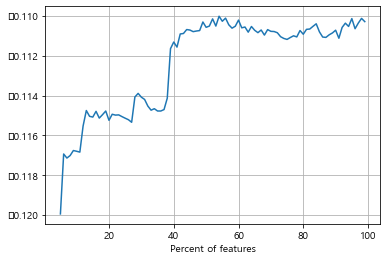

In [111]:
from sklearn.linear_model import Ridge # 0.1113
from sklearn.linear_model import BayesianRidge # 0.1103
from sklearn.ensemble import RandomForestRegressor # 0.1100

from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectPercentile

# 사용할 모델 설정 (속도가 빠른 모델 사용 권장)
model = RandomForestRegressor(random_state=0, n_jobs=-1)

# 각 특성과 타깃(class) 사이에 유의한 통계적 관계가 있는지 계산하여 특성을 선택하는 방법 
cv_scores = []
for p in tqdm(range(5,100,1)):
    X_new = SelectPercentile(percentile=p).fit_transform(X1, y1)    # SelectPercentile: 지정된 비율만큼 특성을 선택한다.
    cv_score = cross_val_score(model, X_new, y1, scoring='neg_mean_absolute_error', cv=5).mean()
    cv_scores.append((p,cv_score))

# Print the best percentile
best_score = cv_scores[np.argmax([score for _, score in cv_scores])]
print(best_score)

# Plot the performance change with p
plt.plot([k for k, _ in cv_scores], [score for _, score in cv_scores])
plt.xlabel('Percent of features')
plt.grid()

In [112]:
# 과적합을 피하기 위해 최적의 p값 주변의 값을 선택하는게 더 나은 결과를 얻을 수 있다. 
fs1 = SelectPercentile(percentile=best_score[0]).fit(X1, y1)
X1_new = pd.DataFrame(fs1.transform(X1))
X_test_new1 = pd.DataFrame(fs1.transform(X_test))

In [113]:
print(X1_new.shape)
print(X_test.columns[fs1.get_support()].tolist()) # get_support: 선택한 특성을 불린값으로 보여줘서 어떤 특성을 선택했는지 알 수 있다.

(2374, 79)
['개인역량_선발_SUM', '개인역량_타순_MEAN', '개인역량_타수_SUM', '개인역량_타수_MEAN', '개인역량_득점_SUM', '개인역량_득점_MEAN', '개인역량_득점_MAX', '개인역량_안타_SUM', '개인역량_안타_MEAN', '개인역량_안타_MAX', '개인역량_2루타_SUM', '개인역량_2루타_MEAN', '개인역량_2루타_MAX', '개인역량_3루타_SUM', '개인역량_홈런_SUM', '개인역량_홈런_MEAN', '개인역량_홈런_MAX', '개인역량_루타_SUM', '개인역량_루타_MEAN', '개인역량_루타_MAX', '개인역량_루타_STD', '개인역량_타점_SUM', '개인역량_타점_MEAN', '개인역량_타점_MAX', '개인역량_타점_STD', '개인역량_도루_SUM', '개인역량_도루_MEAN', '개인역량_도루_MAX', '개인역량_도루실책_SUM', '개인역량_볼넷_SUM', '개인역량_볼넷_MEAN', '개인역량_볼넷_MAX', '개인역량_사구_SUM', '개인역량_고의4구_SUM', '개인역량_고의4구_MEAN', '개인역량_고의4구_MAX', '개인역량_삼진_SUM', '개인역량_병살타_SUM', '개인역량_희생번트_SUM', '개인역량_희생플라이_SUM', '개인역량_투구_MEAN', '개인역량_투구_MAX', '개인역량_RE24_MEAN', '개인역량_RE24_MAX', '개인역량_RE24_STD', '개인역량_WPA_MEAN', '개인역량_WPA_MAX', '개인역량_WPA_STD', '개인역량_WPA/AVLI_MEAN', '개인역량_WPA/AVLI_MAX', '개인역량_WPA/AVLI_STD', '개인역량_연봉_MEAN', '개인역량_상대별WPA_MEAN', '개인역량_배럴_MEAN', '개인역량_배럴_SUM', '개인역량_연봉/나이', '개인역량_상대팀별_배럴_합_H_H', '개인역량_상대팀별_배럴_합_H_T', '개인역량_상대팀별_배럴_합_K_T', '개인역량_상대팀별_배럴_합_

In [114]:
list(set(X_test.columns) - set(X_test.columns[fs1.get_support()].tolist()))

['개인역량_배럴/장타',
 '개인역량_3루타_MAX',
 '개인역량_일타율_MEAN',
 '개인역량_타수_MAX',
 'OB',
 '개인역량_타율_LAST',
 '개인역량_2타/타수',
 "시계열적_('라운드', 'mean')",
 '연도',
 'LG',
 '개인역량_병살타_MEAN',
 '개인역량_배럴/타구',
 '개인역량_도루실책_MAX',
 '개인역량_루타/타수',
 '개인역량_출루율_LAST',
 '시계열적_요일별_일타율_1',
 '개인역량_AVLI_MEAN',
 '팀역량_팀점수_STD',
 '개인역량_배럴/타수',
 '개인역량_사구_MEAN',
 '개인역량_일타율_STD',
 '개인역량_삼진_MAX',
 '팀역량_팀점수_MEAN',
 '시계열적_요일별_WPA/avLI_2',
 '개인역량_타율_STD',
 'NC',
 '시계열적_요일별_WPA/avLI_3',
 '개인역량_희생번트_MEAN',
 '팀역량_최대연승_MAX',
 'LT',
 '개인역량_삼진_MEAN',
 '개인역량_3루타_MEAN',
 '시계열적_요일별_일타율_4',
 '시계열적_요일별_일타율_3',
 '개인역량_사구_MAX',
 'KT',
 '개인역량_나이_MEAN',
 '컨디션_이동거리_가중치_MEAN',
 '개인역량_OPS_LAST',
 '팀역량_L_SUM',
 '개인역량_안타/타수',
 '시계열적_요일별_WPA/avLI_1',
 '개인역량_병살타_MAX',
 '시계열적_요일별_일타율_6',
 'HT',
 'WO',
 '개인역량_장타율_LAST',
 '팀역량_팀점수_MAX',
 '시계열적_요일별_WPA/avLI_6',
 '개인역량_AVLI_STD',
 '개인역량_팀팀WPA_MEAN',
 'HH',
 '팀역량_D_SUM',
 '개인역량_도루실책_MEAN',
 "시계열적_('월', 'mean')",
 '시계열적_요일별_일타율_2',
 '컨디션_이동거리_가중치_STD',
 'SK',
 '개인역량_희생플라이_MEAN',
 '시계열적_요일별_일타율_5',
 '개인역량_홈런/타수',
 '시계열적

In [115]:
X1_new.columns = X_test.columns[fs1.get_support()].tolist()
X_test_new1.columns = X_test.columns[fs1.get_support()].tolist()

In [116]:
X1_new.shape, X_test_new1.shape

((2374, 79), (10, 79))

### 장타율

100%|██████████████████████████████████████████████████████████████████████████████████| 95/95 [00:14<00:00,  6.59it/s]

(71, -0.1675046654779529)


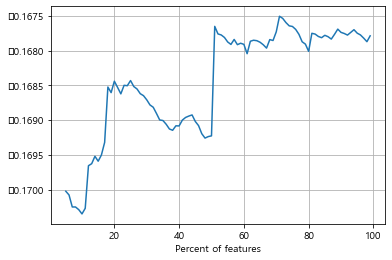

In [117]:
from sklearn.linear_model import Ridge # 0.1704
from sklearn.linear_model import BayesianRidge # 0.1674
from sklearn.ensemble import RandomForestRegressor # 0.1691

from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectPercentile

# 사용할 모델 설정 (속도가 빠른 모델 사용 권장)
model = BayesianRidge()

# 각 특성과 타깃(class) 사이에 유의한 통계적 관계가 있는지 계산하여 특성을 선택하는 방법 
cv_scores = []
for p in tqdm(range(5,100,1)):
    X_new = SelectPercentile(percentile=p).fit_transform(X2, y2)    # SelectPercentile: 지정된 비율만큼 특성을 선택한다.
    cv_score = cross_val_score(model, X_new, y2, scoring='neg_mean_absolute_error', cv=5).mean()
    cv_scores.append((p,cv_score))

# Print the best percentile
best_score = cv_scores[np.argmax([score for _, score in cv_scores])]
print(best_score)

# Plot the performance change with p
plt.plot([k for k, _ in cv_scores], [score for _, score in cv_scores])
plt.xlabel('Percent of features')
plt.grid()

In [118]:
# 과적합을 피하기 위해 최적의 p값 주변의 값을 선택하는게 더 나은 결과를 얻을 수 있다. 
fs2 = SelectPercentile(percentile=best_score[0]).fit(X2, y2)
X2_new = pd.DataFrame(fs2.transform(X2))
X_test_new2 = pd.DataFrame(fs2.transform(X_test))

In [119]:
print(X2_new.shape)
print(X_test.columns[fs2.get_support()].tolist()) #get_support: 선택한 특성을 불린값으로 보여줘서 어떤 특성을 선택했는지 알 수 있다.

(2374, 103)
['개인역량_선발_SUM', '개인역량_타순_MEAN', '개인역량_타수_SUM', '개인역량_타수_MEAN', '개인역량_타수_MAX', '개인역량_득점_SUM', '개인역량_득점_MEAN', '개인역량_득점_MAX', '개인역량_안타_SUM', '개인역량_안타_MEAN', '개인역량_안타_MAX', '개인역량_2루타_SUM', '개인역량_2루타_MEAN', '개인역량_2루타_MAX', '개인역량_3루타_SUM', '개인역량_3루타_MAX', '개인역량_홈런_SUM', '개인역량_홈런_MEAN', '개인역량_홈런_MAX', '개인역량_루타_SUM', '개인역량_루타_MEAN', '개인역량_루타_MAX', '개인역량_루타_STD', '개인역량_타점_SUM', '개인역량_타점_MEAN', '개인역량_타점_MAX', '개인역량_타점_STD', '개인역량_도루_SUM', '개인역량_도루_MEAN', '개인역량_도루_MAX', '개인역량_도루실책_SUM', '개인역량_도루실책_MAX', '개인역량_볼넷_SUM', '개인역량_볼넷_MEAN', '개인역량_볼넷_MAX', '개인역량_사구_SUM', '개인역량_사구_MAX', '개인역량_고의4구_SUM', '개인역량_고의4구_MEAN', '개인역량_고의4구_MAX', '개인역량_삼진_SUM', '개인역량_병살타_SUM', '개인역량_병살타_MAX', '개인역량_희생번트_SUM', '개인역량_희생플라이_SUM', '개인역량_희생플라이_MAX', '개인역량_투구_MEAN', '개인역량_투구_MAX', '개인역량_RE24_MEAN', '개인역량_RE24_MAX', '개인역량_RE24_STD', '개인역량_WPA_MEAN', '개인역량_WPA_MAX', '개인역량_WPA_STD', '개인역량_WPA/AVLI_MEAN', '개인역량_WPA/AVLI_STD', '개인역량_연봉_MEAN', '개인역량_상대별WPA_MEAN', '개인역량_배럴_MEAN', '개인역량_배럴_SUM', '개인역량_연봉/나이', '개인역량

In [120]:
list(set(X_test.columns) - set(X_test.columns[fs2.get_support()].tolist()))

['개인역량_배럴/장타',
 '개인역량_일타율_MEAN',
 '개인역량_타율_LAST',
 '개인역량_2타/타수',
 '연도',
 "시계열적_('라운드', 'mean')",
 '개인역량_병살타_MEAN',
 '개인역량_배럴/타구',
 '개인역량_루타/타수',
 '개인역량_출루율_LAST',
 '시계열적_요일별_일타율_1',
 '개인역량_AVLI_MEAN',
 '팀역량_팀점수_STD',
 '개인역량_배럴/타수',
 '개인역량_사구_MEAN',
 '개인역량_일타율_STD',
 '개인역량_삼진_MAX',
 '팀역량_팀점수_MEAN',
 '개인역량_타율_STD',
 '개인역량_희생번트_MEAN',
 '팀역량_최대연승_MAX',
 '시계열적_요일별_WPA/avLI_5',
 '개인역량_삼진_MEAN',
 '개인역량_3루타_MEAN',
 '시계열적_요일별_일타율_3',
 '개인역량_WPA/AVLI_MAX',
 '개인역량_나이_MEAN',
 '컨디션_이동거리_가중치_MEAN',
 '개인역량_OPS_LAST',
 '개인역량_안타/타수',
 '개인역량_장타율_LAST',
 '개인역량_AVLI_STD',
 '팀역량_팀점수_MAX',
 '개인역량_팀팀WPA_MEAN',
 '개인역량_도루실책_MEAN',
 "시계열적_('월', 'mean')",
 '컨디션_이동거리_가중치_STD',
 '개인역량_희생플라이_MEAN',
 '시계열적_요일별_일타율_5',
 '개인역량_홈런/타수',
 '개인역량_AVLI_MAX',
 '개인역량_희생번트_MAX',
 '개인역량_3타/타수']

In [121]:
X2_new.columns = X_test.columns[fs2.get_support()].tolist()
X_test_new2.columns = X_test.columns[fs2.get_support()].tolist()

In [122]:
X2_new.shape, X_test_new2.shape

((2374, 103), (10, 103))

## HP Tuning
### 출루율

In [127]:
from sklearn.model_selection import train_test_split

train_x, valid_x, train_y, valid_y = train_test_split(X1_new, y1, test_size=0.3, random_state=0)
train_x.shape, valid_x.shape

((1661, 79), (713, 79))

In [128]:
from bayes_opt import BayesianOptimization

In [129]:
bayesian_params = {
    'max_depth':(8, 24),
    'min_samples_split':(8, 24),
    'min_samples_leaf':(8, 24),
}

In [130]:
def rf_nmae_eval(max_depth, min_samples_split, min_samples_leaf):
    
    params = {
        "n_estimators":2000, 
        'max_depth':int(round(max_depth)),
        'min_samples_split': int(round(min_samples_split)),
        'min_samples_leaf': int(round(min_samples_leaf)),
    }
    
    rf_model = RandomForestRegressor(**params, n_jobs=-1)
    rf_model.fit(train_x, train_y)
    valid_pred = rf_model.predict(valid_x)
    nmae = -NMAE(valid_y, valid_pred)
    return nmae

In [131]:
lgbBO = BayesianOptimization(f=rf_nmae_eval, pbounds=bayesian_params, random_state=0)
lgbBO.maximize(init_points=25, n_iter=25)

|   iter    |  target   | max_depth | min_sa... | min_sa... |
-------------------------------------------------------------
|  1        | -0.1126   |  16.78    |  19.44    |  17.64    |
|  2        | -0.1126   |  16.72    |  14.78    |  18.33    |
|  3        | -0.1122   |  15.0     |  22.27    |  23.42    |
|  4        | -0.1125   |  14.14    |  20.67    |  16.46    |
|  5        | -0.1123   |  17.09    |  22.81    |  9.137    |
|  6        | -0.1133   |  9.394    |  8.323    |  21.32    |
|  7        | -0.1124   |  20.45    |  21.92    |  23.66    |
|  8        | -0.1126   |  20.79    |  15.38    |  20.49    |
|  9        | -0.1124   |  9.892    |  18.24    |  10.29    |
|  10       | -0.1126   |  23.11    |  16.35    |  14.63    |
|  11       | -0.1124   |  12.23    |  20.39    |  15.3     |
|  12       | -0.1132   |  17.09    |  8.301    |  17.88    |
|  13       | -0.1125   |  17.79    |  17.87    |  23.1     |
|  14       | -0.1127   |  18.91    |  13.75    |  14.99    |
|  15   

In [132]:
lgbBO.res

[{'target': -0.1125529903818588,
  'params': {'max_depth': 16.781016062837196,
   'min_samples_leaf': 19.443029861958713,
   'min_samples_split': 17.644214017146304}},
 {'target': -0.11263111699012149,
  'params': {'max_depth': 16.718130927950348,
   'min_samples_leaf': 14.778476789422475,
   'min_samples_split': 18.3343058090665}},
 {'target': -0.11223314266015609,
  'params': {'max_depth': 15.00139538020308,
   'min_samples_leaf': 22.268368012513278,
   'min_samples_split': 23.41860416801647}},
 {'target': -0.11248205510811143,
  'params': {'max_depth': 14.135064301212443,
   'min_samples_leaf': 20.667600609322633,
   'min_samples_split': 16.46231871604647}},
 {'target': -0.11227767508603743,
  'params': {'max_depth': 17.088712977502915,
   'min_samples_leaf': 22.809546212682577,
   'min_samples_split': 9.136576931166191}},
 {'target': -0.11330688053190452,
  'params': {'max_depth': 9.394068795224651,
   'min_samples_leaf': 8.323494359045212,
   'min_samples_split': 21.32191752876701

In [133]:
# dictionary에 있는 target값을 모두 추출
target_list = []
for result in lgbBO.res:
    target = result['target']
    target_list.append(target)
print(target_list)
# 가장 큰 target 값을 가지는 순번(index)를 추출
print('maximum target index:', np.argmax(np.array(target_list)))

[-0.1125529903818588, -0.11263111699012149, -0.11223314266015609, -0.11248205510811143, -0.11227767508603743, -0.11330688053190452, -0.11241507186658986, -0.1125863663139037, -0.11238787813493915, -0.11260402931452144, -0.1123618635081815, -0.11320755978111297, -0.11249659700136966, -0.11268882577534628, -0.11308300078966142, -0.11283456114158219, -0.11260517060902504, -0.11233092078586994, -0.11297171912214003, -0.11263242398643335, -0.1130594608090315, -0.11299777900333977, -0.11303831943635395, -0.11234707696375956, -0.11231684881762569, -0.11226356506931577, -0.11235875461725037, -0.11235148131940383, -0.11230936966962984, -0.11227958281483516, -0.11230077289057998, -0.1123880781901863, -0.11239392854435552, -0.11243960958208193, -0.11221913009206716, -0.11237231439491357, -0.11223699719386479, -0.11227126682930028, -0.11240202140959797, -0.11224712861880891, -0.11235325925831396, -0.11247590798339412, -0.11234654238081113, -0.1122174672008869, -0.11226857468966396, -0.112170057808

In [134]:
# 가장 큰 target값을 가지는 index값을 기준으로 res에서 해당 parameter 추출. 
max_dict = lgbBO.res[np.argmax(np.array(target_list))]
print(max_dict)

{'target': -0.1121700578084645, 'params': {'max_depth': 17.22384273039365, 'min_samples_leaf': 23.99568945964228, 'min_samples_split': 20.81299694397169}}


In [289]:
from sklearn.model_selection import KFold

def train_apps_all_with_oof1(ftr, target, nfolds=5):
    ftr = ftr
    target = target

    # nfolds 개의 cross validatin fold set을 가지는 KFold 생성 
    folds = KFold(n_splits=nfolds, shuffle=True, random_state=0)
    
    # Out of Folds로 학습된 모델의 validation set을 예측하여 결과 확률을 담을 array 생성.
    # validation set가 n_split갯수만큼 있으므로 크기는 ftr_app의 크기가 되어야 함. 
    oof_preds = np.zeros((ftr.shape[0],))  
    
    # Ouf of Folds로 학습된 모델의 test dataset을 예측하여 결과 확률을 담을 array 생성. 
    test_preds = np.zeros(((X_test.shape[0],)))
    
    # n_estimators를 4000까지 확대. 
    rf = RandomForestRegressor(
                n_jobs=-1,
                n_estimators=4000,
                max_depth=17,
                min_samples_split=21,
                min_samples_leaf=24,
                )

    # nfolds 번 cross validation Iteration 반복하면서 OOF 방식으로 학습 및 테스트 데이터 예측
    for fold_idx, (train_idx, valid_idx) in enumerate(folds.split(ftr)):
        print('##### iteration ', fold_idx, ' 시작')
        # 학습용 데이터 세트의 인덱스와 검증용 데이터 세트의 인덱스 추출하여 이를 기반으로 학습/검증 데이터 추출
        train_x = ftr.iloc[train_idx, :]
        train_y = target.iloc[train_idx]
        valid_x = ftr.iloc[valid_idx, :]
        valid_y = target.iloc[valid_idx]
        
        # 추출된 학습/검증 데이터 세트로 모델 학습. early_stopping은 200으로 증가. 
        rf.fit(train_x, train_y)
        # 검증 데이터 세트로 예측된 확률 저장. 사용되지는 않음. 
        #oof_preds[valid_idx] = clf.predict(valid_x, num_iteration=clf.best_iteration_)       
        # 학습된 모델로 테스트 데이터 세트에 예측 확률 계산. 
        # nfolds 번 반복 실행하므로 평균 확률을 구하기 위해 개별 수행시 마다 수행 횟수로 나눈 확률을 추후에 더해서 최종 평균 확률 계산. 
        test_preds += rf.predict(X_test_new1)/folds.n_splits
        
        
    return rf, test_preds

In [198]:
rf1, rf_preds_1 = train_apps_all_with_oof(X1_new, y1, nfolds=5)

##### iteration  0  시작
##### iteration  1  시작
##### iteration  2  시작
##### iteration  3  시작
##### iteration  4  시작


In [199]:
rf_preds_1

array([0.47021491, 0.44512995, 0.50821476, 0.50360056, 0.51142185,
       0.4891775 , 0.44188975, 0.50811862, 0.50773064, 0.44052968])

### 장타율

In [138]:
train_x, valid_x, train_y, valid_y = train_test_split(X2_new, y2, test_size=0.3, random_state=0)
train_x.shape, valid_x.shape

((1661, 104), (713, 104))

In [139]:
def rf_nmae_eval(max_depth, min_samples_split, min_samples_leaf):
    
    params = {
        "n_estimators":2000, 
        'max_depth':int(round(max_depth)),
        'min_samples_split': int(round(min_samples_split)),
        'min_samples_leaf': int(round(min_samples_leaf)),
    }
    
    rf_model = RandomForestRegressor(**params, n_jobs=-1)
    rf_model.fit(train_x, train_y)
    valid_pred = rf_model.predict(valid_x)
    nmae = -NMAE(valid_y, valid_pred)
    return nmae

In [140]:
lgbBO = BayesianOptimization(f=rf_nmae_eval, pbounds=bayesian_params, random_state=0)
lgbBO.maximize(init_points=25, n_iter=25)

|   iter    |  target   | max_depth | min_sa... | min_sa... |
-------------------------------------------------------------
|  1        | -0.1683   |  16.78    |  19.44    |  17.64    |
|  2        | -0.1683   |  16.72    |  14.78    |  18.33    |
|  3        | -0.1683   |  15.0     |  22.27    |  23.42    |
|  4        | -0.1684   |  14.14    |  20.67    |  16.46    |
|  5        | -0.1683   |  17.09    |  22.81    |  9.137    |
|  6        | -0.1683   |  9.394    |  8.323    |  21.32    |
|  7        | -0.1681   |  20.45    |  21.92    |  23.66    |
|  8        | -0.1684   |  20.79    |  15.38    |  20.49    |
|  9        | -0.1682   |  9.892    |  18.24    |  10.29    |
|  10       | -0.1682   |  23.11    |  16.35    |  14.63    |
|  11       | -0.1683   |  12.23    |  20.39    |  15.3     |
|  12       | -0.1686   |  17.09    |  8.301    |  17.88    |
|  13       | -0.1682   |  17.79    |  17.87    |  23.1     |
|  14       | -0.1684   |  18.91    |  13.75    |  14.99    |
|  15   

In [141]:
# dictionary에 있는 target값을 모두 추출
target_list = []
for result in lgbBO.res:
    target = result['target']
    target_list.append(target)
print(target_list)
# 가장 큰 target 값을 가지는 순번(index)를 추출
print('maximum target index:', np.argmax(np.array(target_list)))

[-0.16829721305244705, -0.1682579573529882, -0.16832341518777266, -0.16837854400740848, -0.16833827019408726, -0.1682782480124512, -0.168106417807109, -0.16843734847389738, -0.16820516676716576, -0.16823144762114706, -0.16831919819203117, -0.16857951920051756, -0.16824307644037143, -0.16835616589932315, -0.16826025402765726, -0.16846100719203538, -0.16837382663268963, -0.16835924583729556, -0.16833255411067524, -0.16846518408400205, -0.16861419138940956, -0.16824448172699222, -0.16852459758386487, -0.16830168372918497, -0.16834865206396277, -0.1682605808398651, -0.16825078073645544, -0.1681759651037232, -0.16831371135605208, -0.16832159843599234, -0.1682089417142136, -0.16847382160682425, -0.1686808745259563, -0.1683318363835736, -0.16829994042420376, -0.1683623734282311, -0.1681995195440327, -0.16822000589634692, -0.16815441332303738, -0.16825095937663426, -0.16834683515189997, -0.16830770178943855, -0.1683546849449114, -0.16830204210349156, -0.16823230307958162, -0.16857656938548185,

In [142]:
# 가장 큰 target값을 가지는 index값을 기준으로 res에서 해당 parameter 추출. 
max_dict = lgbBO.res[np.argmax(np.array(target_list))]
print(max_dict)

{'target': -0.168106417807109, 'params': {'max_depth': 20.450508015197606, 'min_samples_leaf': 21.92019437194911, 'min_samples_split': 23.657893475724222}}


In [200]:
from sklearn.model_selection import KFold

def train_apps_all_with_oof(ftr, target, nfolds=5):
    ftr = ftr
    target = target

    # nfolds 개의 cross validatin fold set을 가지는 KFold 생성 
    folds = KFold(n_splits=nfolds, shuffle=True, random_state=0)
    
    # Out of Folds로 학습된 모델의 validation set을 예측하여 결과 확률을 담을 array 생성.
    # validation set가 n_split갯수만큼 있으므로 크기는 ftr_app의 크기가 되어야 함. 
    oof_preds = np.zeros((ftr.shape[0],))  
    
    # Ouf of Folds로 학습된 모델의 test dataset을 예측하여 결과 확률을 담을 array 생성. 
    test_preds = np.zeros(((X_test.shape[0],)))
    
    # n_estimators를 4000까지 확대. 
    rf = RandomForestRegressor(
                n_jobs=-1,
                n_estimators=4000,
                max_depth=20,
                min_samples_split=24,
                min_samples_leaf=22,
                )

    # nfolds 번 cross validation Iteration 반복하면서 OOF 방식으로 학습 및 테스트 데이터 예측
    for fold_idx, (train_idx, valid_idx) in enumerate(folds.split(ftr)):
        print('##### iteration ', fold_idx, ' 시작')
        # 학습용 데이터 세트의 인덱스와 검증용 데이터 세트의 인덱스 추출하여 이를 기반으로 학습/검증 데이터 추출
        train_x = ftr.iloc[train_idx, :]
        train_y = target.iloc[train_idx]
        valid_x = ftr.iloc[valid_idx, :]
        valid_y = target.iloc[valid_idx]
        
        # 추출된 학습/검증 데이터 세트로 모델 학습. early_stopping은 200으로 증가. 
        rf.fit(train_x, train_y)
        # 검증 데이터 세트로 예측된 확률 저장. 사용되지는 않음. 
        #oof_preds[valid_idx] = clf.predict(valid_x, num_iteration=clf.best_iteration_)       
        # 학습된 모델로 테스트 데이터 세트에 예측 확률 계산. 
        # nfolds 번 반복 실행하므로 평균 확률을 구하기 위해 개별 수행시 마다 수행 횟수로 나눈 확률을 추후에 더해서 최종 평균 확률 계산. 
        test_preds += rf.predict(X_test_new2)/folds.n_splits
        
        
    return rf, test_preds

In [201]:
rf2, rf_preds_2 = train_apps_all_with_oof(X2_new, y2, nfolds=5)

##### iteration  0  시작
##### iteration  1  시작
##### iteration  2  시작
##### iteration  3  시작
##### iteration  4  시작


In [202]:
rf_preds_2

array([0.59183872, 0.54151081, 0.65910079, 0.68556951, 0.69471786,
       0.62205729, 0.53924617, 0.6490552 , 0.6528407 , 0.48407613])

In [203]:
rf_preds = rf_preds_1 + rf_preds_2

In [204]:
rf_preds

array([1.06205363, 0.98664077, 1.16731555, 1.18917008, 1.20613971,
       1.11123479, 0.98113592, 1.15717382, 1.16057133, 0.92460581])

### LIME

In [205]:
import lime
import lime.lime_tabular

### 출루율
explainer1 = lime.lime_tabular.LimeTabularExplainer(np.array(X1_new),
                                                   feature_names=X1_new.columns,
                                                   class_names=['quality'],
                                                   # categorical_features=,
                                                   # There is no categorical features in this example, otherwise specify them.
                                                   verbose=True, mode='regression')
### 장타율
explainer2 = lime.lime_tabular.LimeTabularExplainer(np.array(X2_new),
                                                   feature_names=X2_new.columns,
                                                   class_names=['quality'],
                                                   # categorical_features=,
                                                   # There is no categorical features in this example, otherwise specify them.
                                                   verbose=True, mode='regression')

Intercept 0.35311136293976
Prediction_local [0.4610128]
Right: 0.4713590094776876
Intercept 0.37936115334391984
Prediction_local [0.56078162]
Right: 0.6069634844723445


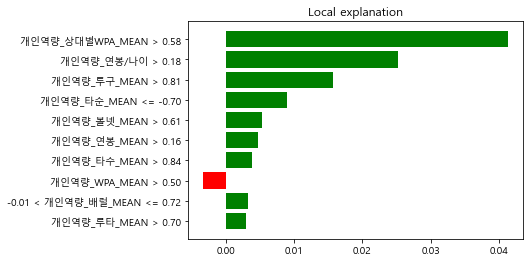

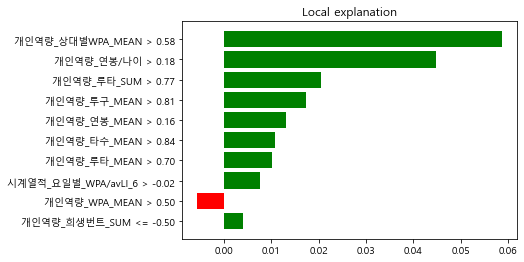

In [226]:
# 67341 이정후
exp1 = explainer1.explain_instance(X_test_new1.iloc[0], rf1.predict, num_features=10) # 출루율
exp2 = explainer2.explain_instance(X_test_new2.iloc[0], rf2.predict, num_features=10) # 장타율
exp1.as_pyplot_figure()
exp2.as_pyplot_figure()
plt.show()

In [123]:
chul0 = ['개인역량_상대별WPA_MEAN', '개인역량_연봉/나이', '개인역량_투구_MEAN', '개인역량_타순_MEAN', '개인역량_볼넷_MEAN',
     '개인역량_연봉_MEAN', '개인역량_타수_MEAN', '개인역량_WPA_MEAN', '개인역량_배럴_MEAN', '개인역량_루타_MEAN']

jang0 = ['개인역량_상대별WPA_MEAN', '개인역량_연봉/나이', '개인역량_루타_SUM', '개인역량_투구_MEAN', '개인역량_연봉_MEAN',
     '개인역량_타수_MEAN', '개인역량_루타_MEAN', '시계열적_요일별_WPA/avLI_6', '개인역량_WPA_MEAN', '개인역량_희생번트_SUM']

Intercept 0.35835570286079227
Prediction_local [0.44782313]
Right: 0.43967958165975285
Intercept 0.3985448143191809
Prediction_local [0.51307042]
Right: 0.5198318987496043


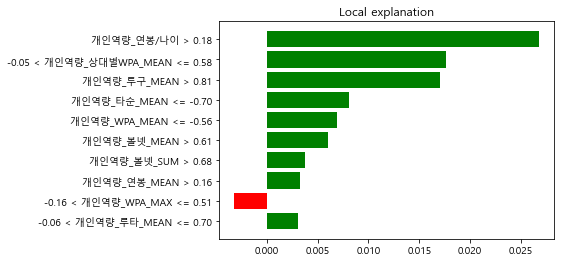

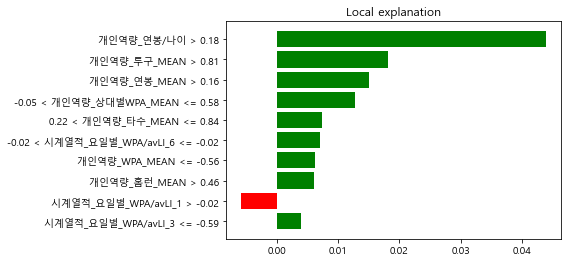

In [227]:
# 67872 로맥
exp1 = explainer1.explain_instance(X_test_new1.iloc[1], rf1.predict, num_features=10) # 출루율
exp2 = explainer2.explain_instance(X_test_new2.iloc[1], rf2.predict, num_features=10) # 장타율
exp1.as_pyplot_figure()
exp2.as_pyplot_figure()
plt.show()

In [124]:
chul1 = ['개인역량_연봉/나이', '개인역량_상대별WPA_MEAN', '개인역량_투구_MEAN', '개인역량_타순_MEAN', '개인역량_WPA_MEAN',
         '개인역량_볼넷_MEAN', '개인역량_볼넷_SUM', '개인역량_연봉_MEAN', '개인역량_WPA_MAX',  '개인역량_루타_MEAN', ]

jang1 = ['개인역량_상대별WPA_MEAN', '개인역량_연봉/나이', '시계열적_요일별_WPA/avLI_3', '개인역량_투구_MEAN', '개인역량_연봉_MEAN',
         '개인역량_타수_MEAN', '시계열적_요일별_WPA/avLI_1', '시계열적_요일별_WPA/avLI_6', '개인역량_WPA_MEAN', '개인역량_홈런_MEAN']

Intercept 0.35480129473507516
Prediction_local [0.45796943]
Right: 0.5105552146593179
Intercept 0.3824631321461058
Prediction_local [0.55895625]
Right: 0.6868096447382903


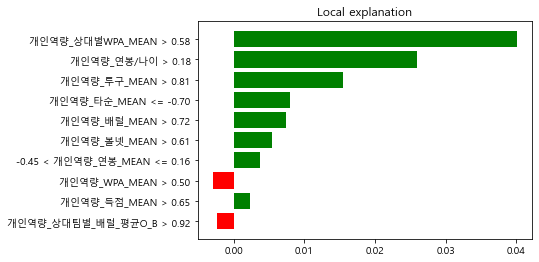

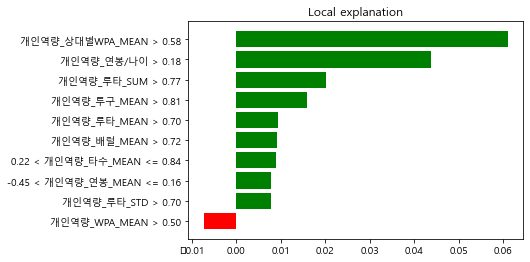

In [228]:
# 68050 강백호
exp1 = explainer1.explain_instance(X_test_new1.iloc[2], rf1.predict, num_features=10) # 출루율
exp2 = explainer2.explain_instance(X_test_new2.iloc[2], rf2.predict, num_features=10) # 장타율
exp1.as_pyplot_figure()
exp2.as_pyplot_figure()
plt.show()

In [125]:
chul2 = ['개인역량_연봉/나이', '개인역량_상대별WPA_MEAN', '개인역량_투구_MEAN', '개인역량_타순_MEAN', '개인역량_WPA_MEAN',
         '개인역량_볼넷_MEAN', '개인역량_배럴_MEAN', '개인역량_연봉_MEAN', '개인역량_득점_MEAN',  '개인역량_상대팀별_배럴_평균O_B']

jang2 = ['개인역량_상대별WPA_MEAN', '개인역량_연봉/나이', '개인역량_루타_SUM', '개인역량_투구_MEAN', '개인역량_연봉_MEAN',
         '개인역량_타수_MEAN', '개인역량_배럴_MEAN', '개인역량_루타_STD', '개인역량_WPA_MEAN', '개인역량_루타_MEAN']

Intercept 0.35628748223081785
Prediction_local [0.45549561]
Right: 0.5072798676734149
Intercept 0.38208515291169787
Prediction_local [0.55974181]
Right: 0.7094126264457489


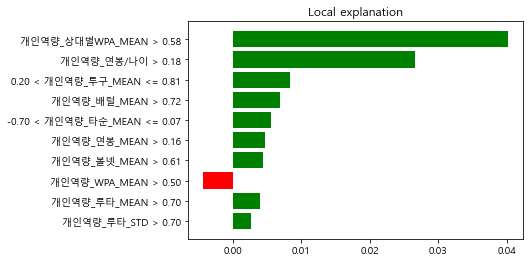

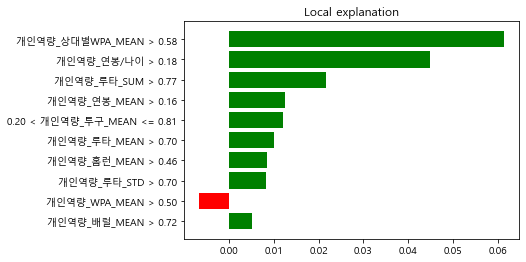

In [229]:
# 75847 최정
exp1 = explainer1.explain_instance(X_test_new1.iloc[3], rf1.predict, num_features=10) # 출루율
exp2 = explainer2.explain_instance(X_test_new2.iloc[3], rf2.predict, num_features=10) # 장타율
exp1.as_pyplot_figure()
exp2.as_pyplot_figure()
plt.show()

In [126]:
chul3 = ['개인역량_연봉/나이', '개인역량_상대별WPA_MEAN', '개인역량_투구_MEAN', '개인역량_타순_MEAN', '개인역량_WPA_MEAN',
         '개인역량_볼넷_MEAN', '개인역량_배럴_MEAN', '개인역량_연봉_MEAN', '개인역량_루타_MEAN',  '개인역량_루타_STD']

jang3 = ['개인역량_상대별WPA_MEAN', '개인역량_연봉/나이', '개인역량_루타_SUM', '개인역량_투구_MEAN', '개인역량_연봉_MEAN',
         '개인역량_홈런_MEAN', '개인역량_배럴_MEAN', '개인역량_루타_STD', '개인역량_WPA_MEAN', '개인역량_루타_MEAN']

Intercept 0.3566143583015515
Prediction_local [0.45089633]
Right: 0.5138206668592149
Intercept 0.37764373797004436
Prediction_local [0.57242105]
Right: 0.7132130730606382


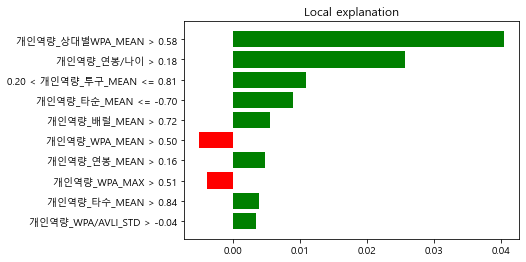

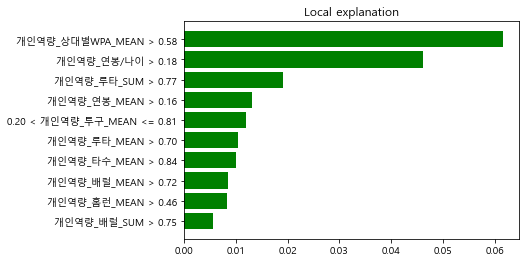

In [230]:
# 76232 양의지
exp1 = explainer1.explain_instance(X_test_new1.iloc[4], rf1.predict, num_features=10) # 출루율
exp2 = explainer2.explain_instance(X_test_new2.iloc[4], rf2.predict, num_features=10) # 장타율
exp1.as_pyplot_figure()
exp2.as_pyplot_figure()
plt.show()

In [127]:
chul4 = ['개인역량_연봉/나이', '개인역량_상대별WPA_MEAN', '개인역량_투구_MEAN', '개인역량_타순_MEAN', '개인역량_WPA_MEAN',
         '개인역량_WPA_MAX', '개인역량_배럴_MEAN', '개인역량_연봉_MEAN', '개인역량_타수_MEAN',  '개인역량_WPA/AVLI_STD']

jang4 = ['개인역량_상대별WPA_MEAN', '개인역량_연봉/나이', '개인역량_루타_SUM', '개인역량_투구_MEAN', '개인역량_연봉_MEAN',
         '개인역량_홈런_MEAN', '개인역량_배럴_MEAN', '개인역량_타수_MEAN', '개인역량_배럴_SUM', '개인역량_루타_MEAN']

Intercept 0.3551015635798995
Prediction_local [0.45660876]
Right: 0.4991564296518299
Intercept 0.381895413469101
Prediction_local [0.56238179]
Right: 0.6389258797513327


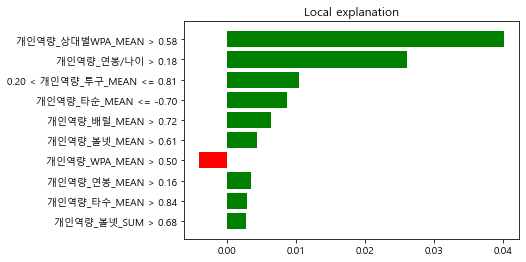

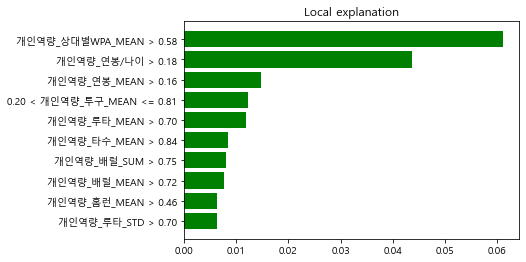

In [231]:
# 76290 김현수
exp1 = explainer1.explain_instance(X_test_new1.iloc[5], rf1.predict, num_features=10) # 출루율
exp2 = explainer2.explain_instance(X_test_new2.iloc[5], rf2.predict, num_features=10) # 장타율
exp1.as_pyplot_figure()
exp2.as_pyplot_figure()
plt.show()

In [128]:
chul5 = ['개인역량_연봉/나이', '개인역량_상대별WPA_MEAN', '개인역량_투구_MEAN', '개인역량_타순_MEAN', '개인역량_WPA_MEAN',
         '개인역량_볼넷_MEAN', '개인역량_배럴_MEAN', '개인역량_연봉_MEAN', '개인역량_타수_MEAN',  '개인역량_볼넷_SUM']

jang5 = ['개인역량_상대별WPA_MEAN', '개인역량_연봉/나이', '개인역량_배럴_SUM', '개인역량_투구_MEAN', '개인역량_연봉_MEAN',
         '개인역량_홈런_MEAN', '개인역량_배럴_MEAN', '개인역량_타수_MEAN', '개인역량_루타_STD', '개인역량_루타_MEAN']

Intercept 0.35284450204694057
Prediction_local [0.46456062]
Right: 0.4429734383474358
Intercept 0.3845034016431219
Prediction_local [0.55106832]
Right: 0.5412117731915537


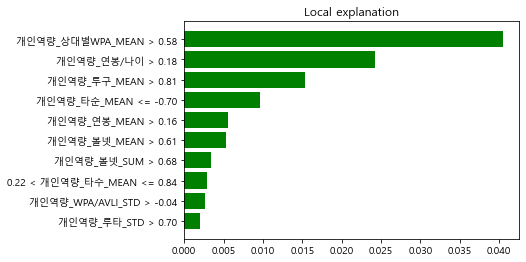

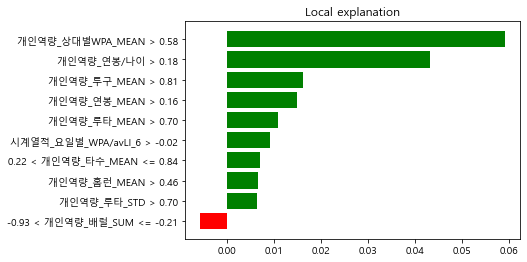

In [232]:
# 78224 김재환
exp1 = explainer1.explain_instance(X_test_new1.iloc[6], rf1.predict, num_features=10) # 출루율
exp2 = explainer2.explain_instance(X_test_new2.iloc[6], rf2.predict, num_features=10) # 장타율
exp1.as_pyplot_figure()
exp2.as_pyplot_figure()
plt.show()

In [129]:
chul6 = ['개인역량_연봉/나이', '개인역량_상대별WPA_MEAN', '개인역량_투구_MEAN', '개인역량_타순_MEAN', '개인역량_루타_STD',
         '개인역량_볼넷_MEAN', '개인역량_WPA/AVLI_STD', '개인역량_연봉_MEAN', '개인역량_타수_MEAN',  '개인역량_볼넷_SUM']

jang6 = ['개인역량_상대별WPA_MEAN', '개인역량_연봉/나이', '시계열적_요일별_WPA/avLI_6', '개인역량_투구_MEAN', '개인역량_연봉_MEAN',
         '개인역량_홈런_MEAN', '개인역량_배럴_SUM', '개인역량_타수_MEAN', '개인역량_루타_STD', '개인역량_루타_MEAN']

Intercept 0.35541413136821515
Prediction_local [0.45855403]
Right: 0.5168765477050736
Intercept 0.38290611800874036
Prediction_local [0.56177916]
Right: 0.6942869915560943


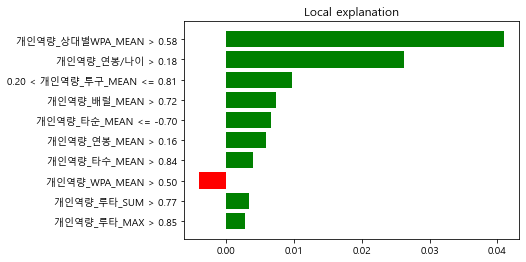

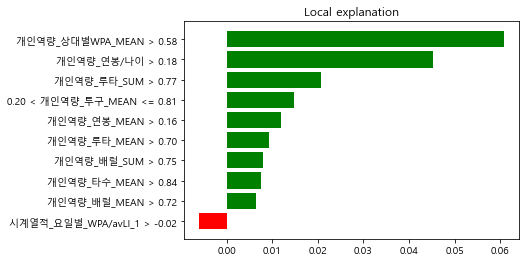

In [233]:
# 78513 전준우
exp1 = explainer1.explain_instance(X_test_new1.iloc[7], rf1.predict, num_features=10) # 출루율
exp2 = explainer2.explain_instance(X_test_new2.iloc[7], rf2.predict, num_features=10) # 장타율
exp1.as_pyplot_figure()
exp2.as_pyplot_figure()
plt.show()

In [130]:
chul7 = ['개인역량_연봉/나이', '개인역량_상대별WPA_MEAN', '개인역량_투구_MEAN', '개인역량_타순_MEAN', '개인역량_루타_SUM',
         '개인역량_루타_MAX', '개인역량_WPA_MEAN', '개인역량_연봉_MEAN', '개인역량_타수_MEAN',  '개인역량_배럴_MEAN']

jang7 = ['개인역량_상대별WPA_MEAN', '개인역량_연봉/나이', '시계열적_요일별_WPA/avLI_1', '개인역량_투구_MEAN', '개인역량_연봉_MEAN',
         '개인역량_배럴_MEAN', '개인역량_배럴_SUM', '개인역량_타수_MEAN', '개인역량_루타_SUM', '개인역량_루타_MEAN']

Intercept 0.3543465505180943
Prediction_local [0.45798492]
Right: 0.5123902950358337
Intercept 0.38310420965920566
Prediction_local [0.55706018]
Right: 0.6737987009472199


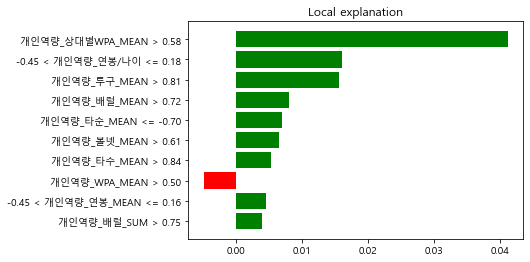

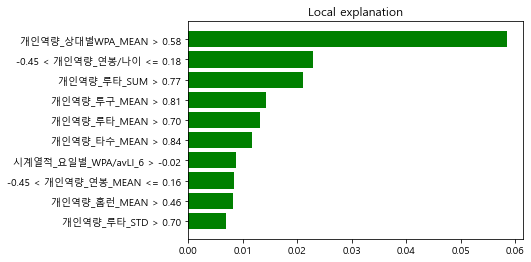

In [234]:
# 79192 채은성
exp1 = explainer1.explain_instance(X_test_new1.iloc[8], rf1.predict, num_features=10) # 출루율
exp2 = explainer2.explain_instance(X_test_new2.iloc[8], rf2.predict, num_features=10) # 장타율
exp1.as_pyplot_figure()
exp2.as_pyplot_figure()
plt.show()

In [131]:
chul8 = ['개인역량_연봉/나이', '개인역량_상대별WPA_MEAN', '개인역량_투구_MEAN', '개인역량_타순_MEAN', '개인역량_배럴_SUM',
         '개인역량_배럴_MEAN', '개인역량_WPA_MEAN', '개인역량_연봉_MEAN', '개인역량_타수_MEAN',  '개인역량_볼넷_MEAN']

jang8 = ['개인역량_상대별WPA_MEAN', '개인역량_연봉/나이', '시계열적_요일별_WPA/avLI_6', '개인역량_투구_MEAN', '개인역량_연봉_MEAN',
         '개인역량_홈런_MEAN', '개인역량_루타_STD', '개인역량_타수_MEAN', '개인역량_루타_SUM', '개인역량_루타_MEAN']

Intercept 0.35818064079638673
Prediction_local [0.44400753]
Right: 0.4317324121449281
Intercept 0.39753313151440794
Prediction_local [0.51010054]
Right: 0.4739827133051864


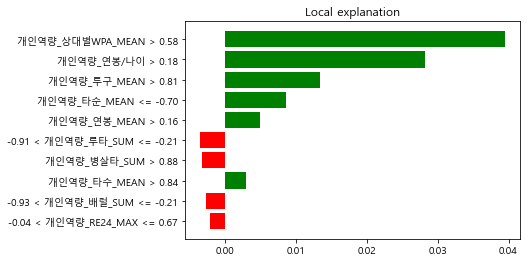

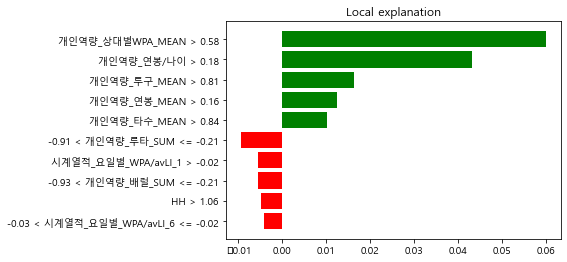

In [235]:
# 79215 박건우
exp1 = explainer1.explain_instance(X_test_new1.iloc[9], rf1.predict, num_features=10) # 출루율
exp2 = explainer2.explain_instance(X_test_new2.iloc[9], rf2.predict, num_features=10) # 장타율
exp1.as_pyplot_figure()
exp2.as_pyplot_figure()
plt.show()

In [132]:
chul9 = ['개인역량_연봉/나이', '개인역량_상대별WPA_MEAN', '개인역량_투구_MEAN', '개인역량_타순_MEAN', '개인역량_배럴_SUM',
         '개인역량_루타_SUM', '개인역량_병살타_SUM', '개인역량_연봉_MEAN', '개인역량_타수_MEAN',  '개인역량_RE24_MAX']

jang9 = ['개인역량_상대별WPA_MEAN', '개인역량_연봉/나이', '시계열적_요일별_WPA/avLI_1', '개인역량_투구_MEAN', '개인역량_연봉_MEAN',
         'HH', '시계열적_요일별_WPA/avLI_6', '개인역량_타수_MEAN', '개인역량_루타_SUM', '개인역량_배럴_SUM']

In [133]:
# LIME에서 영향을 주는 상위 10개의 피처를 골라서 셀렉션함
chul = set(chul0) | set(chul1) | set(chul2) | set(chul3) | set(chul4) | set(chul5) | set(chul6) | set(chul7) | set(chul8) | set(chul9)
jang = set(jang0) | set(jang1) | set(jang2) | set(jang3) | set(jang4) | set(jang5) | set(jang6) | set(jang7) | set(jang8) | set(jang9)

In [134]:
len(chul), chul

(21,
 {'개인역량_RE24_MAX',
  '개인역량_WPA/AVLI_STD',
  '개인역량_WPA_MAX',
  '개인역량_WPA_MEAN',
  '개인역량_득점_MEAN',
  '개인역량_루타_MAX',
  '개인역량_루타_MEAN',
  '개인역량_루타_STD',
  '개인역량_루타_SUM',
  '개인역량_배럴_MEAN',
  '개인역량_배럴_SUM',
  '개인역량_병살타_SUM',
  '개인역량_볼넷_MEAN',
  '개인역량_볼넷_SUM',
  '개인역량_상대별WPA_MEAN',
  '개인역량_상대팀별_배럴_평균O_B',
  '개인역량_연봉/나이',
  '개인역량_연봉_MEAN',
  '개인역량_타수_MEAN',
  '개인역량_타순_MEAN',
  '개인역량_투구_MEAN'})

In [135]:
len(jang), jang

(17,
 {'HH',
  '개인역량_WPA_MEAN',
  '개인역량_루타_MEAN',
  '개인역량_루타_STD',
  '개인역량_루타_SUM',
  '개인역량_배럴_MEAN',
  '개인역량_배럴_SUM',
  '개인역량_상대별WPA_MEAN',
  '개인역량_연봉/나이',
  '개인역량_연봉_MEAN',
  '개인역량_타수_MEAN',
  '개인역량_투구_MEAN',
  '개인역량_홈런_MEAN',
  '개인역량_희생번트_SUM',
  '시계열적_요일별_WPA/avLI_1',
  '시계열적_요일별_WPA/avLI_3',
  '시계열적_요일별_WPA/avLI_6'})

In [136]:
X1_final = X1_new[chul].drop('개인역량_상대팀별_배럴_평균O_B', axis=1)
X1_test_final = X_test_new1[chul].drop('개인역량_상대팀별_배럴_평균O_B', axis=1)

In [137]:
X2_final = X2_new[jang]
X2_test_final = X_test_new2[jang]

In [138]:
from sklearn.model_selection import KFold

def train_apps_all_with_oof1(ftr, target, nfolds=5):
    ftr = ftr
    target = target

    # nfolds 개의 cross validatin fold set을 가지는 KFold 생성 
    folds = KFold(n_splits=nfolds, shuffle=True, random_state=0)
    
    # Out of Folds로 학습된 모델의 validation set을 예측하여 결과 확률을 담을 array 생성.
    # validation set가 n_split갯수만큼 있으므로 크기는 ftr_app의 크기가 되어야 함. 
    oof_preds = np.zeros((ftr.shape[0],))  
    
    # Ouf of Folds로 학습된 모델의 test dataset을 예측하여 결과 확률을 담을 array 생성. 
    test_preds = np.zeros(((X_test.shape[0],)))
    
    # n_estimators를 4000까지 확대. 
    rf = RandomForestRegressor(
                n_jobs=-1,
                n_estimators=4000,
                max_depth=17,
                min_samples_split=21,
                min_samples_leaf=24,
                )

    # nfolds 번 cross validation Iteration 반복하면서 OOF 방식으로 학습 및 테스트 데이터 예측
    for fold_idx, (train_idx, valid_idx) in enumerate(folds.split(ftr)):
        print('##### iteration ', fold_idx, ' 시작')
        # 학습용 데이터 세트의 인덱스와 검증용 데이터 세트의 인덱스 추출하여 이를 기반으로 학습/검증 데이터 추출
        train_x = ftr.iloc[train_idx, :]
        train_y = target.iloc[train_idx]
        valid_x = ftr.iloc[valid_idx, :]
        valid_y = target.iloc[valid_idx]
        
        # 추출된 학습/검증 데이터 세트로 모델 학습. early_stopping은 200으로 증가. 
        rf.fit(train_x, train_y)
        # 검증 데이터 세트로 예측된 확률 저장. 사용되지는 않음. 
        #oof_preds[valid_idx] = clf.predict(valid_x, num_iteration=clf.best_iteration_)       
        # 학습된 모델로 테스트 데이터 세트에 예측 확률 계산. 
        # nfolds 번 반복 실행하므로 평균 확률을 구하기 위해 개별 수행시 마다 수행 횟수로 나눈 확률을 추후에 더해서 최종 평균 확률 계산. 
        test_preds += rf.predict(X1_test_final)/folds.n_splits
        
        
    return rf, test_preds

In [139]:
rf1, rf_preds_1 = train_apps_all_with_oof1(X1_final, y1, nfolds=5)

##### iteration  0  시작
##### iteration  1  시작
##### iteration  2  시작
##### iteration  3  시작
##### iteration  4  시작


In [140]:
from sklearn.model_selection import KFold

def train_apps_all_with_oof2(ftr, target, nfolds=5):
    ftr = ftr
    target = target

    # nfolds 개의 cross validatin fold set을 가지는 KFold 생성 
    folds = KFold(n_splits=nfolds, shuffle=True, random_state=0)
    
    # Out of Folds로 학습된 모델의 validation set을 예측하여 결과 확률을 담을 array 생성.
    # validation set가 n_split갯수만큼 있으므로 크기는 ftr_app의 크기가 되어야 함. 
    oof_preds = np.zeros((ftr.shape[0],))  
    
    # Ouf of Folds로 학습된 모델의 test dataset을 예측하여 결과 확률을 담을 array 생성. 
    test_preds = np.zeros(((X_test.shape[0],)))
    
    # n_estimators를 4000까지 확대. 
    rf = RandomForestRegressor(
                n_jobs=-1,
                n_estimators=4000,
                max_depth=20,
                min_samples_split=24,
                min_samples_leaf=22,
                )

    # nfolds 번 cross validation Iteration 반복하면서 OOF 방식으로 학습 및 테스트 데이터 예측
    for fold_idx, (train_idx, valid_idx) in enumerate(folds.split(ftr)):
        print('##### iteration ', fold_idx, ' 시작')
        # 학습용 데이터 세트의 인덱스와 검증용 데이터 세트의 인덱스 추출하여 이를 기반으로 학습/검증 데이터 추출
        train_x = ftr.iloc[train_idx, :]
        train_y = target.iloc[train_idx]
        valid_x = ftr.iloc[valid_idx, :]
        valid_y = target.iloc[valid_idx]
        
        # 추출된 학습/검증 데이터 세트로 모델 학습. early_stopping은 200으로 증가. 
        rf.fit(train_x, train_y)
        # 검증 데이터 세트로 예측된 확률 저장. 사용되지는 않음. 
        #oof_preds[valid_idx] = clf.predict(valid_x, num_iteration=clf.best_iteration_)       
        # 학습된 모델로 테스트 데이터 세트에 예측 확률 계산. 
        # nfolds 번 반복 실행하므로 평균 확률을 구하기 위해 개별 수행시 마다 수행 횟수로 나눈 확률을 추후에 더해서 최종 평균 확률 계산. 
        test_preds += rf.predict(X2_test_final)/folds.n_splits
        
        
    return rf, test_preds

In [141]:
rf2, rf_preds_2 = train_apps_all_with_oof2(X2_final, y2, nfolds=5)

##### iteration  0  시작
##### iteration  1  시작
##### iteration  2  시작
##### iteration  3  시작
##### iteration  4  시작


In [142]:
rf_preds_1

array([0.46865295, 0.44827834, 0.50741492, 0.505798  , 0.51270167,
       0.49166846, 0.44042263, 0.50900833, 0.51039089, 0.43703585])

In [143]:
rf_preds_2

array([0.57801313, 0.56535642, 0.65890528, 0.70348385, 0.71660343,
       0.64346227, 0.54715176, 0.64339794, 0.66002454, 0.48590917])

### Submission

In [144]:
pred1 = pd.DataFrame(rf_preds_1, columns=['출루율'])
pred2 = pd.DataFrame(rf_preds_2, columns=['장타율'])
sub = pd.concat([train21, pred1, pred2], axis=1)

In [145]:
# 서브미션
submission_1=pd.read_excel('data/02_평가데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_평가데이터.xlsx')
submission_1.loc[0,'OPS'] = 1.097
submission_1.PCODE[1]=76232;submission_1.PCODE[2]=68050;submission_1.PCODE[3]=75847;submission_1.PCODE[4]=67341;submission_1.PCODE[5]=79192
submission_1.PCODE[6]=78224;submission_1.PCODE[7]=78513;submission_1.PCODE[8]=76290;submission_1.PCODE[9]=79215;submission_1.PCODE[10]=67872;
submission_1 = submission_1.iloc[1:-1, :]

In [146]:
submission_1.columns = ['NO.', '선수코드', 'OPS', '장타율', '출루율']
submission_1 = submission_1.drop(['장타율', '출루율'], axis=1)
submission_1 = submission_1.merge(sub[['선수코드', '장타율', '출루율']], on='선수코드', how='left')
submission_1['OPS'] = submission_1['출루율'] + submission_1['장타율']

In [147]:
lst = ['양의지', '강백호', '최정', '이정후', '채은성', '김재환', '전준우', '김현수', '박건우', '로맥']

In [148]:
submission_1['선수명'] = lst

In [152]:
submission_1

,NO.,선수코드,OPS,장타율,출루율,선수명
0,1,76232,1.229305,0.716603,0.512702,양의지
1,2,68050,1.166320,0.658905,0.507415,강백호
2,3,75847,1.209282,0.703484,0.505798,최정
3,4,67341,1.046666,0.578013,0.468653,이정후
4,5,79192,1.170415,0.660025,0.510391,채은성
5,6,78224,0.987574,0.547152,0.440423,김재환
6,7,78513,1.152406,0.643398,0.509008,전준우
7,8,76290,1.135131,0.643462,0.491668,김현수
8,9,79215,0.922945,0.485909,0.437036,박건우
9,10,67872,1.013635,0.565356,0.448278,로맥


In [151]:
submission_1.iloc[:, :-1].to_csv('POK_제출파일.csv')

In [223]:
# 2020년 마지막 21라운드의 결과
round21_2020=pd.concat([train20_4,test20_4.reset_index(drop='index')],axis=1)
round21_2020=pd.merge(submission[['NO.','선수코드']],round21_2020[['선수코드','OPS','출루율','장타율']],how='left',on='선수코드')
pd.merge(round21_2020,submission[['선수코드','선수명']],how='left',on='선수코드')

,NO.,선수코드,OPS,출루율,장타율,선수명
0,1,76232,1.339506,0.506173,0.833333,양의지
1,2,68050,1.478837,0.630000,0.848837,강백호
2,3,75847,1.405632,0.579545,0.826087,최정
3,4,67341,0.856944,0.412500,0.444444,이정후
4,5,79192,1.206917,0.505618,0.701299,채은성
5,6,78224,1.236983,0.515464,0.721519,김재환
6,7,78513,1.061651,0.425287,0.636364,전준우
7,8,76290,0.715616,0.377778,0.337838,김현수
8,9,79215,1.207952,0.534483,0.673469,박건우
9,10,67872,1.560012,0.630435,0.929577,로맥


In [224]:
# 2019년 마지막 21라운드의 결과
round21_2020=pd.concat([train19_4,test19_4.reset_index(drop='index')],axis=1)
round21_2020=pd.merge(submission[['NO.','선수코드']],round21_2020[['선수코드','OPS','출루율','장타율']],how='left',on='선수코드')
pd.merge(round21_2020,submission[['선수코드','선수명']],how='left',on='선수코드')

,NO.,선수코드,OPS,출루율,장타율,선수명
0,1,76232,1.157460,0.506667,0.650794,양의지
1,2,68050,1.111111,0.500000,0.611111,강백호
2,3,75847,0.910349,0.397849,0.512500,최정
3,4,67341,0.960623,0.472527,0.488095,이정후
4,5,79192,0.970313,0.405797,0.564516,채은성
5,6,78224,0.862839,0.424242,0.438596,김재환
6,7,78513,0.897436,0.397436,0.500000,전준우
7,8,76290,0.548230,0.230769,0.317460,김현수
8,9,79215,0.912485,0.465116,0.447368,박건우
9,10,67872,1.303400,0.560976,0.742424,로맥


In [225]:
# 2018년 마지막 21라운드의 결과
round21_2020=pd.concat([train18_4,test18_4.reset_index(drop='index')],axis=1)
round21_2020=pd.merge(submission[['NO.','선수코드']],round21_2020[['선수코드','OPS','출루율','장타율']],how='left',on='선수코드')
pd.merge(round21_2020,submission[['선수코드','선수명']],how='left',on='선수코드')

,NO.,선수코드,OPS,출루율,장타율,선수명
0,1,76232,1.275641,0.583333,0.692308,양의지
1,2,68050,1.275573,0.509615,0.765957,강백호
2,3,75847,1.145226,0.484848,0.660377,최정
3,4,67341,1.026472,0.474747,0.551724,이정후
4,5,79192,1.040612,0.438202,0.602410,채은성
5,6,78224,1.009217,0.428571,0.580645,김재환
6,7,78513,1.240059,0.525773,0.714286,전준우
7,8,76290,NaN,NaN,NaN,김현수
8,9,79215,0.993056,0.437500,0.555556,박건우
9,10,67872,1.261198,0.563830,0.697368,로맥
